# Final Project : Data mining and casualties prediction on the California Traffic Collision Data from SWITRS

**Course Name:** Data mining

**Experiment Name:** Using data mining methods and machine learning classification on the California Traffic Collision Data from SWITRS

**Major:** Software engineering

**Class:** Master

**Student Name:** Abdelhamid HADILI

**Student ID:** 2022124967

**Date:** 2023/06/5

In [2]:
import pandas as pd 
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Retrieve the number of rows the collisions table:

In [6]:
# Create a connection to the SQLite database
conn = sqlite3.connect('switrs.sqlite')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute the SQL query
query = "SELECT COUNT(*) FROM collisions;"
cursor.execute(query)

# Fetch the result
result = cursor.fetchone()

# Print the result
print(result)

# Close the cursor and the connection
cursor.close()
conn.close()

(9424334,)


In [7]:
# Connect to the SQLite database
conn = sqlite3.connect('switrs.sqlite')

# Create a cursor object
cursor = conn.cursor()

# Get the table names from the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Loop through the table names and fetch the column names for each table
for table in table_names:
    table_name = table[0]
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    column_names = [column[1] for column in columns]
    print(f"Columns for table '{table_name}':")
    if table_name == 'collisions':
        collisions_columns = column_names
    print(column_names)
    print()

# Close the connection
conn.close()

Columns for table 'case_ids':
['case_id', 'db_year']

Columns for table 'collisions':
['case_id', 'jurisdiction', 'officer_id', 'reporting_district', 'chp_shift', 'population', 'county_city_location', 'county_location', 'special_condition', 'beat_type', 'chp_beat_type', 'city_division_lapd', 'chp_beat_class', 'beat_number', 'primary_road', 'secondary_road', 'distance', 'direction', 'intersection', 'weather_1', 'weather_2', 'state_highway_indicator', 'caltrans_county', 'caltrans_district', 'state_route', 'route_suffix', 'postmile_prefix', 'postmile', 'location_type', 'ramp_intersection', 'side_of_highway', 'tow_away', 'collision_severity', 'killed_victims', 'injured_victims', 'party_count', 'primary_collision_factor', 'pcf_violation_code', 'pcf_violation_category', 'pcf_violation', 'pcf_violation_subsection', 'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface', 'road_condition_1', 'road_condition_2', 'lighting', 'control_device', 'chp_r

In [8]:
collisions_columns


['case_id',
 'jurisdiction',
 'officer_id',
 'reporting_district',
 'chp_shift',
 'population',
 'county_city_location',
 'county_location',
 'special_condition',
 'beat_type',
 'chp_beat_type',
 'city_division_lapd',
 'chp_beat_class',
 'beat_number',
 'primary_road',
 'secondary_road',
 'distance',
 'direction',
 'intersection',
 'weather_1',
 'weather_2',
 'state_highway_indicator',
 'caltrans_county',
 'caltrans_district',
 'state_route',
 'route_suffix',
 'postmile_prefix',
 'postmile',
 'location_type',
 'ramp_intersection',
 'side_of_highway',
 'tow_away',
 'collision_severity',
 'killed_victims',
 'injured_victims',
 'party_count',
 'primary_collision_factor',
 'pcf_violation_code',
 'pcf_violation_category',
 'pcf_violation',
 'pcf_violation_subsection',
 'hit_and_run',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'pedestrian_action',
 'road_surface',
 'road_condition_1',
 'road_condition_2',
 'lighting',
 'control_device',
 'chp_road_type',
 'pedestrian_collision',


reducing my data to only focus on the last 10 years:

In [18]:
# Create a connection to the SQLite database
conn = sqlite3.connect('switrs.sqlite')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Define the query to retrieve data for the last 10 years
query = "SELECT * FROM collisions WHERE collision_date >= date('now', '-10 years');"

latest_collisions = pd.read_sql_query(query, con, parse_dates=["collision_date"])

cursor.close()
conn.close()


In [17]:
# Create a connection to the SQLite database
conn = sqlite3.connect('switrs.sqlite')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute the SQL query
query = "SELECT COUNT(*) FROM collisions WHERE collision_date >= date('now', '-10 years');"
cursor.execute(query)

# Fetch the result
result = cursor.fetchone()

# Print the result
print(result)

# Close the cursor and the connection
cursor.close()
conn.close()

(3492836,)


the shape of the dataset:

In [19]:
latest_collisions.shape

(3492836, 75)

convert the collisions table into csv and work with it:

In [20]:
latest_collisions.to_csv('latest_collisions.csv', index=False)

# Data preparation:

In [24]:
latest_collisions.head()

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,county_location,special_condition,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_road,secondary_road,distance,direction,intersection,weather_1,weather_2,state_highway_indicator,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_highway,tow_away,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_code,pcf_violation_category,pcf_violation,pcf_violation_subsection,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,control_device,chp_road_type,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,not_private_property,alcohol_involved,statewide_vehicle_type_at_fault,chp_vehicle_type_at_fault,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,0081715,1941.0,11342,212,not chp,>250000,1941,los angeles,0,not chp,not chp,None,not chp,003,PATTERSON ST,ATLANTIC AV,0.0,None,1.0,cloudy,None,0.0,None,NaN,NaN,None,None,NaN,None,None,None,1.0,property damage only,0,0,2.0,vehicle code violation,None,speeding,22350.0,None,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,None,daylight,none,0,0,0,0,0,1.0,NaN,None,None,0,0,0,0,0,0,0,0,0.0,None,None,NaN,NaN,2020-03-14,07:45:00,2020-06-22
1,0726202,3600.0,8945,064,not chp,50000 to 100000,3612,san bernardino,0,not chp,not chp,None,not chp,005,AMARGOSA,MARICOPA RD,0.0,None,NaN,clear,None,0.0,None,NaN,NaN,None,None,NaN,None,None,None,1.0,property damage only,0,0,1.0,vehicle code violation,None,speeding,22350.0,None,misdemeanor,hit object,fixed object,no pedestrian involved,dry,normal,None,dark with street lights,none,0,0,0,0,0,1.0,NaN,passenger car,"passenger car, station",0,0,0,0,0,0,0,0,0.0,None,None,NaN,NaN,2020-07-26,02:50:00,2020-09-30
2,5530777,9250.0,18735,None,1400 thru 2159,unincorporated,3400,sacramento,0,chp county roadarea,county road area,None,chp other,010,GILMAN WY,CORNELIA WY,55.0,north,0.0,clear,None,0.0,None,NaN,NaN,None,None,NaN,None,None,None,0.0,property damage only,0,0,2.0,vehicle code violation,None,improper turning,22107.0,None,misdemeanor,head-on,other motor vehicle,no pedestrian involved,dry,normal,None,daylight,none,0,0,0,0,0,1.0,NaN,pickup or panel truck,pickups & panels,0,0,0,0,0,0,0,0,0.0,None,None,NaN,NaN,2013-07-08,16:00:00,2013-08-05
3,5643901,9126.0,15245,None,1400 thru 2159,unincorporated,1200,humboldt,0,chp county roadline,county road line,None,chp primary,008,MAPLE LN,REDWOOD DR,132.0,east,0.0,clear,None,0.0,None,NaN,NaN,None,None,NaN,None,None,None,0.0,property damage only,0,0,2.0,vehicle code violation,None,improper turning,22107.0,None,not hit and run,sideswipe,parked motor vehicle,no pedestrian involved,dry,normal,None,daylight,none,0,0,0,0,0,1.0,NaN,pickup or panel truck,pickups & panels,0,0,0,0,0,0,0,0,0.0,None,None,NaN,NaN,2013-06-05,16:00:00,2014-01-22
4,5673707,9855.0,18580,None,2200 thru 0559,100000 to 250000,3604,san bernardino,0,chp state highway,interstate,None,chp other,201,RT 210,SIERRA AV,1534.0,west,0.0,clear,None,1.0,san bernardino,8.0,210.0,None,None,14.64,highway,None,eastbound,1.0,property damage only,0,0,2.0,vehicle code violation,None,speeding,22350.0,None,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,None,dark with street lights,none,1,0,0,0,1,1.0,NaN,other bus,other commercial,0,0,0,0,0,0,0,0,0.0,None,None,NaN,NaN,2013-06-22,04:11:00,2014-03-06


Performing the necessary steps to prepare and process the data:

Selecting relevant columns, handling missing values, and encoding categorical variables.

In [3]:
# Specify the path to your CSV file
csv_file_path = "latest_collisions.csv"

# Define the relevant column names
relevant_columns = [
    "alcohol_involved",
    "collision_date",
    "collision_severity",
    "collision_time",
    "control_device",
    "injured_victims",
    "killed_victims",
    "lighting",
    "motor_vehicle_involved_with",
    "motorcycle_collision",
    "pcf_violation_category",
    "pedestrian_action",
    "pedestrian_collision",
    "population",
    "primary_collision_factor",
    "road_surface",
    "truck_collision",
    "type_of_collision",
    "weather_1"
]

# Read the CSV file and select only the relevant columns
relevant_collisions_data = pd.read_csv(csv_file_path, usecols=relevant_columns)

# Display the resulting DataFrame
relevant_collisions_data.head()

,population,weather_1,collision_severity,killed_victims,injured_victims,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,lighting,control_device,pedestrian_collision,motorcycle_collision,truck_collision,alcohol_involved,collision_date,collision_time
0,>250000,cloudy,property damage only,0,0,vehicle code violation,speeding,rear end,other motor vehicle,no pedestrian involved,dry,daylight,none,0,0,0,NaN,2020-03-14,07:45:00
1,50000 to 100000,clear,property damage only,0,0,vehicle code violation,speeding,hit object,fixed object,no pedestrian involved,dry,dark with street lights,none,0,0,0,NaN,2020-07-26,02:50:00
2,unincorporated,clear,property damage only,0,0,vehicle code violation,improper turning,head-on,other motor vehicle,no pedestrian involved,dry,daylight,none,0,0,0,NaN,2013-07-08,16:00:00
3,unincorporated,clear,property damage only,0,0,vehicle code violation,improper turning,sideswipe,parked motor vehicle,no pedestrian involved,dry,daylight,none,0,0,0,NaN,2013-06-05,16:00:00
4,100000 to 250000,clear,property damage only,0,0,vehicle code violation,speeding,rear end,other motor vehicle,no pedestrian involved,dry,dark with street lights,none,0,0,1,NaN,2013-06-22,04:11:00


## Understanding the Data

Familiarizing ourselves with the structure and contents of the SWITRS dataset. Understanding the meaning of each attribute and identify the target variable(s) we want to predict or classify.

In [60]:
print("dimension of the SWITRS dataset: {}".format(relevant_collisions_data.shape))
print("n dimentions of the SWITRS dataset: {}".format(relevant_collisions_data.ndim))
print("size of diabetes the SWITRS data: {}".format(relevant_collisions_data.size))

dimension of the SWITRS dataset: (3492836, 19)
n dimentions of the SWITRS dataset: 2
size of diabetes the SWITRS data: 66363884


In [133]:
relevant_collisions_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455541 entries, 0 to 3492835
Data columns (total 20 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   population                   object        
 1   weather_1                    object        
 2   collision_severity           object        
 3   killed_victims               int64         
 4   injured_victims              int64         
 5   primary_collision_factor     object        
 6   pcf_violation_category       object        
 7   type_of_collision            object        
 8   motor_vehicle_involved_with  object        
 9   pedestrian_action            object        
 10  road_surface                 object        
 11  lighting                     object        
 12  control_device               object        
 13  pedestrian_collision         int64         
 14  motorcycle_collision         int64         
 15  truck_collision              int64         
 16  

In [62]:
relevant_collisions_data.isnull().sum()

population                           0
weather_1                        10638
collision_severity                   0
killed_victims                       0
injured_victims                      0
primary_collision_factor         11458
pcf_violation_category           32634
type_of_collision                30322
motor_vehicle_involved_with      18503
pedestrian_action                 2472
road_surface                     22235
lighting                         13747
control_device                   20400
pedestrian_collision                 0
motorcycle_collision                 0
truck_collision                      0
alcohol_involved               3139833
collision_date                       0
collision_time                   32900
dtype: int64

# DATA preprocessing

Clean and preprocess the dataset to handle missing values, outliers, and inconsistencies. Convert categorical variables into numeric representations (e.g., one-hot encoding) and normalize numerical variables if necessary. Split the dataset into training and testing subsets.

<h3>weather values : 

In [4]:
column_name = 'weather_1'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

clear      2979578
cloudy      380639
raining     102637
fog          10333
other         4076
snowing       3404
wind          1531
Name: weather_1, dtype: int64
---------------------------
null values in weather_1 : 10638


In [5]:
relevant_collisions_data['weather_1'].fillna('clear', inplace=True)

weather_values = relevant_collisions_data.weather_1.value_counts()
weather_null = relevant_collisions_data.weather_1.isnull().sum()
print(weather_values)
print('---------------------------')
print(f'null values in weather_1 : {weather_null}')

clear      2990216
cloudy      380639
raining     102637
fog          10333
other         4076
snowing       3404
wind          1531
Name: weather_1, dtype: int64
---------------------------
null values in weather_1 : 0


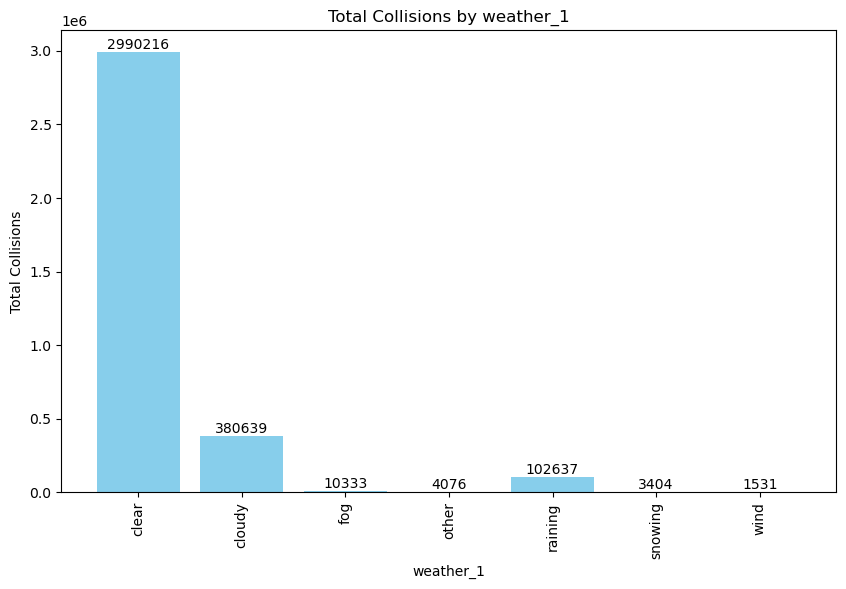

In [6]:
column_name = 'weather_1'

collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

<h3>collision_severity values :

In [7]:
column_name = 'collision_severity'

value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

property damage only    2072255
pain                     866485
other injury             433274
severe injury             94936
fatal                     25885
N                             1
Name: collision_severity, dtype: int64
---------------------------
null values in collision_severity : 0


In [8]:
relevant_collisions_data = relevant_collisions_data.drop(relevant_collisions_data[relevant_collisions_data[column_name] == 'N'].index)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

property damage only    2072255
pain                     866485
other injury             433274
severe injury             94936
fatal                     25885
Name: collision_severity, dtype: int64
---------------------------
null values in collision_severity : 0


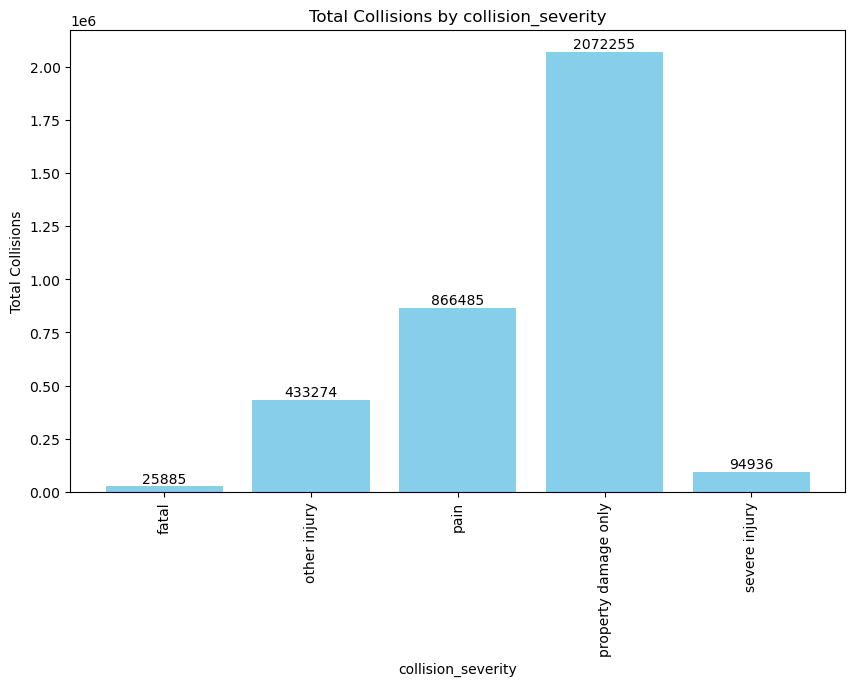

In [9]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

<h3>killed_victims values :

In [10]:
column_name = 'killed_victims'
value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

0     3466950
1       24116
2        1454
3         217
4          73
5          19
6           4
10          1
13          1
Name: killed_victims, dtype: int64
---------------------------
null values in killed_victims : 0


In [11]:
column_name = 'killed_victims'
values_to_replace= [2,3,4,5,6,10,13]

for i in values_to_replace:
    relevant_collisions_data[column_name] = relevant_collisions_data[column_name].replace(i, 1)


value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

0    3466950
1      25885
Name: killed_victims, dtype: int64
---------------------------
null values in killed_victims : 0


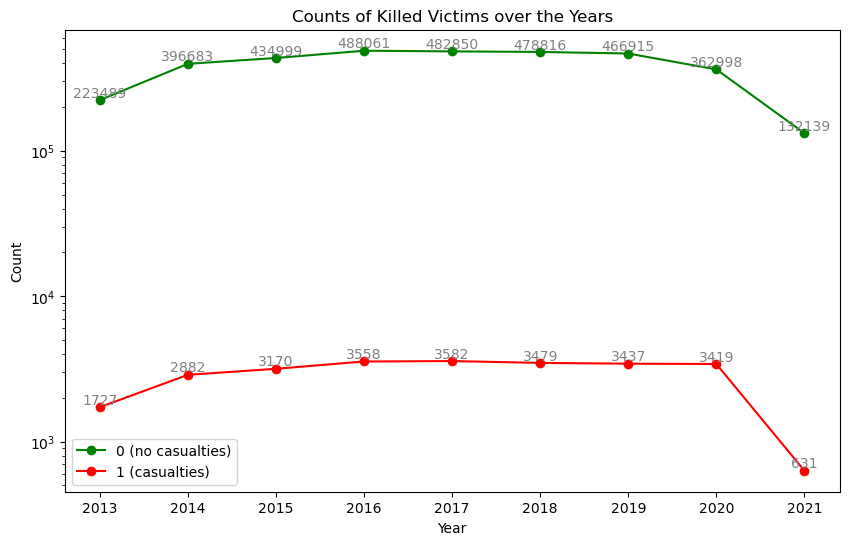

In [12]:
# Convert 'collision_date' to datetime data type
relevant_collisions_data['collision_date'] = pd.to_datetime(relevant_collisions_data['collision_date'])

# Group the data by collision year and calculate the counts of killed victims
killed_victims_counts = relevant_collisions_data.groupby([relevant_collisions_data['collision_date'].dt.year,
                                                          'killed_victims']).size().unstack(fill_value=0)

# Create a line graph with markers and labels
plt.figure(figsize=(10, 6))
plt.plot(killed_victims_counts.index, killed_victims_counts[0], color='green', marker='o',
         linestyle='-', label='0 (no casualties)')
plt.plot(killed_victims_counts.index, killed_victims_counts[1], color='red', marker='o',
         linestyle='-', label='1 (casualties)')

# Add labels to the markers
for x, y0, y1 in zip(killed_victims_counts.index, killed_victims_counts[0], killed_victims_counts[1]):
    plt.text(x, y0, str(y0), ha='center', va='bottom', color='grey')
    plt.text(x, y1, str(y1), ha='center', va='bottom', color='grey')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Killed Victims over the Years')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.legend()
plt.show()

<h3>injured_victims values :

In [13]:
column_name = 'injured_victims'

value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

0     2088642
1     1007728
2      273127
3       81641
4       26588
5        9494
6        3346
7        1207
8         524
9         251
10        102
11         49
12         27
13         22
15         18
14         12
16         12
17          8
18          8
20          5
19          4
22          3
21          2
24          2
28          2
29          2
31          2
33          2
49          1
34          1
39          1
25          1
30          1
Name: injured_victims, dtype: int64
---------------------------
null values in injured_victims : 0


In [14]:
values_to_replace= [i for i in range(2,100)]


for i in values_to_replace:
    relevant_collisions_data[column_name] = relevant_collisions_data[column_name].replace(i, 1)


value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

0    2088642
1    1404193
Name: injured_victims, dtype: int64
---------------------------
null values in injured_victims : 0


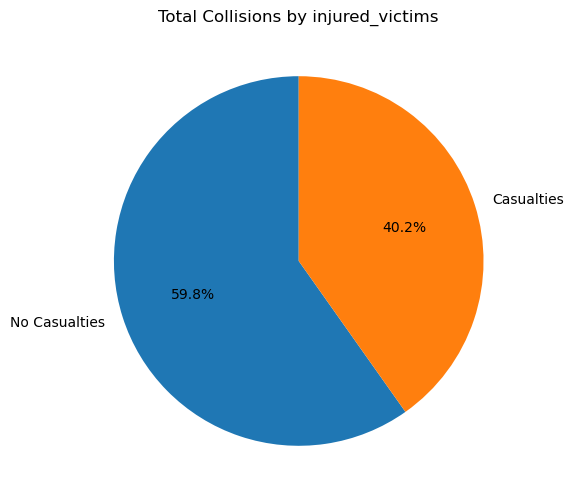

In [15]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
labels = ['No Casualties' if value == 0 else 'Casualties' for value in collision_counts.index]
plt.pie(collision_counts.values, autopct='%1.1f%%', startangle=90,labels = labels)
plt.title(f'Total Collisions by {column_name}')

    
plt.show()

<h3>primary_collision_factor values : 

In [16]:
column_name = 'primary_collision_factor'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

vehicle code violation    3304184
unknown                     78257
other than driver           78127
other improper driving      20732
fell asleep                    77
Name: primary_collision_factor, dtype: int64
---------------------------
null values in primary_collision_factor : 11458


In [17]:
value_to_replace= 'unknown'
value_to_drop = '2' 

relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)
relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)


relevant_collisions_data = relevant_collisions_data.drop(relevant_collisions_data[relevant_collisions_data[column_name] == value_to_drop].index)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

vehicle code violation    3304184
unknown                     89715
other than driver           78127
other improper driving      20732
fell asleep                    77
Name: primary_collision_factor, dtype: int64
---------------------------
null values in primary_collision_factor : 0


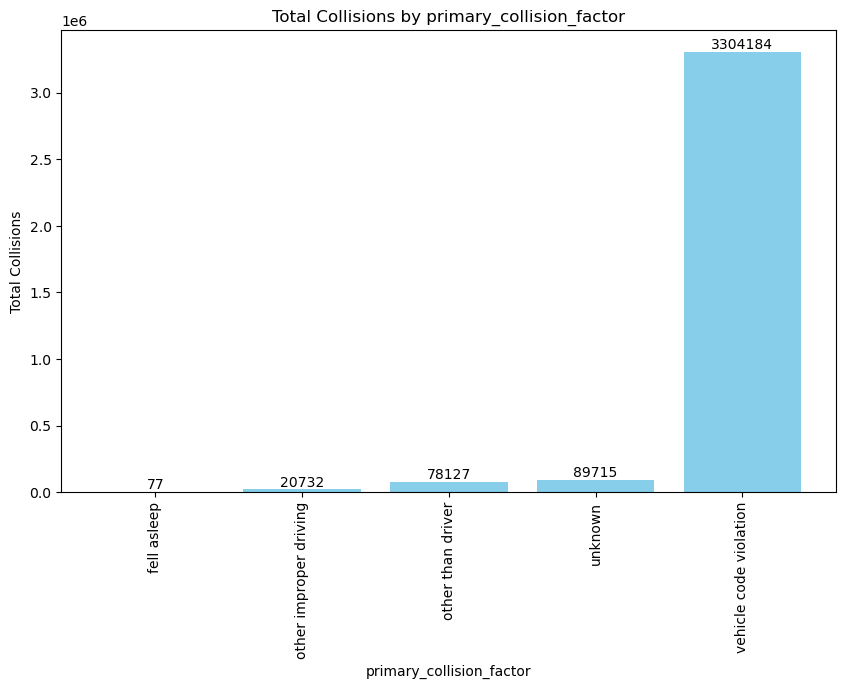

In [18]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

<h3>pcf_violation_category values : 

In [19]:
column_name = 'pcf_violation_category'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

speeding                             1112032
improper turning                      667011
automobile right of way               372290
dui                                   265138
unsafe lane change                    262015
traffic signals and signs             188129
unsafe starting or backing            114599
unknown                               101105
other than driver (or pedestrian)      78127
wrong side of road                     68034
following too closely                  60434
pedestrian right of way                39984
pedestrian violation                   38012
improper passing                       31300
other hazardous violation              30089
other improper driving                 20902
hazardous parking                       3999
other equipment                         3974
impeding traffic                        1986
brakes                                   547
lights                                   417
fell asleep                               77
22350     

In [20]:
value_to_replace= 'unknown'
value_to_drop = '22350' 

relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)
relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)


relevant_collisions_data = relevant_collisions_data.drop(relevant_collisions_data[relevant_collisions_data[column_name] == value_to_drop].index)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

speeding                             1112032
improper turning                      667011
automobile right of way               372290
dui                                   265138
unsafe lane change                    262015
traffic signals and signs             188129
unknown                               133738
unsafe starting or backing            114599
other than driver (or pedestrian)      78127
wrong side of road                     68034
following too closely                  60434
pedestrian right of way                39984
pedestrian violation                   38012
improper passing                       31300
other hazardous violation              30089
other improper driving                 20902
hazardous parking                       3999
other equipment                         3974
impeding traffic                        1986
brakes                                   547
lights                                   417
fell asleep                               77
Name: pcf_

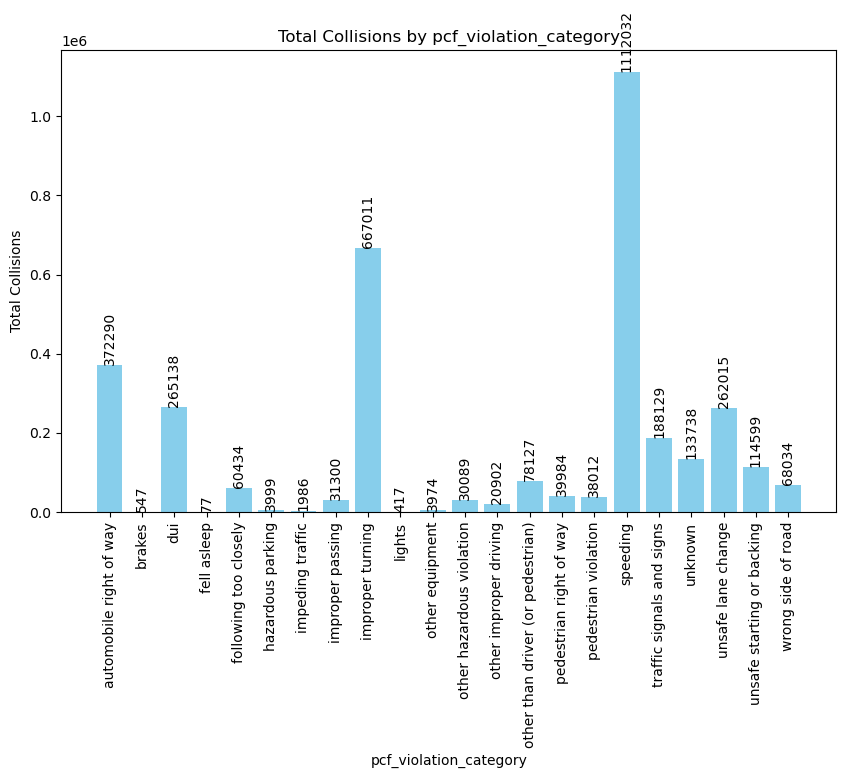

In [21]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom',rotation=90)
    
plt.show()

<h3> type_of_collision values :

In [22]:
column_name = 'type_of_collision'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

rear end      1165792
sideswipe      672891
broadside      627505
hit object     564186
head-on        155292
pedestrian      98765
other           90715
overturned      87363
I                   2
N                   1
O                   1
Name: type_of_collision, dtype: int64
---------------------------
null values in type_of_collision : 30321


In [23]:
value_to_replace= 'other'
value_to_drop = ['I','N','O']

relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)
relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)

for i in value_to_drop:
    relevant_collisions_data = relevant_collisions_data.drop(relevant_collisions_data[relevant_collisions_data[column_name] == i].index)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

rear end      1165792
sideswipe      672891
broadside      627505
hit object     564186
head-on        155292
other          121036
pedestrian      98765
overturned      87363
Name: type_of_collision, dtype: int64
---------------------------
null values in type_of_collision : 0


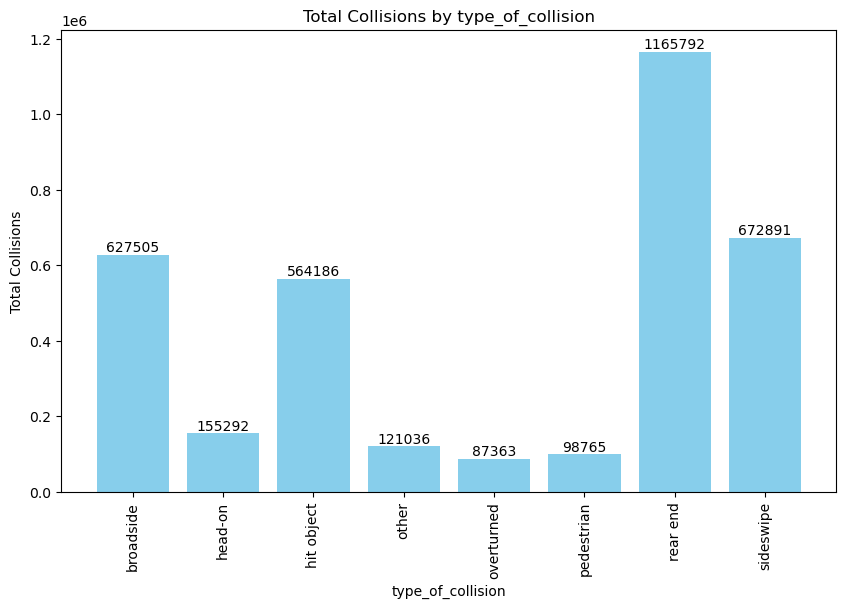

In [24]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

<h3> motor_vehicle_involved_with values :

In [25]:
column_name = 'motor_vehicle_involved_with'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

other motor vehicle               2264405
fixed object                       539893
parked motor vehicle               272655
pedestrian                         106343
non-collision                       87601
bicycle                             84545
other object                        76628
motor vehicle on other roadway      24470
animal                              16441
train                                 991
8                                     192
2                                     139
9                                      12
0                                       5
7                                       3
4                                       3
3                                       1
Name: motor_vehicle_involved_with, dtype: int64
---------------------------
null values in motor_vehicle_involved_with : 18503


In [26]:
value_to_drop = ['8','2','9','0','7','4','3']

relevant_collisions_data.dropna(subset=[column_name], inplace=True)

for i in value_to_drop:
    relevant_collisions_data = relevant_collisions_data.drop(relevant_collisions_data[relevant_collisions_data[column_name] == i].index)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

other motor vehicle               2264405
fixed object                       539893
parked motor vehicle               272655
pedestrian                         106343
non-collision                       87601
bicycle                             84545
other object                        76628
motor vehicle on other roadway      24470
animal                              16441
train                                 991
Name: motor_vehicle_involved_with, dtype: int64
---------------------------
null values in motor_vehicle_involved_with : 0


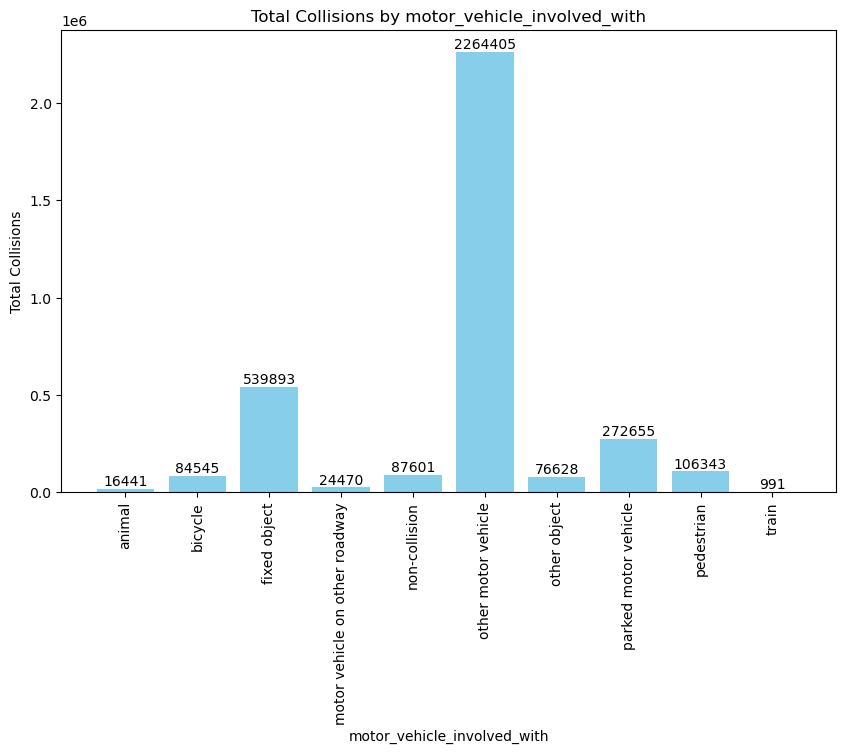

In [27]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

<h3> pedestrian_action values : 

In [28]:
column_name = 'pedestrian_action'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

no pedestrian involved                 3363706
crossing in intersection crosswalk       48547
crossing not in crosswalk                28425
in road                                  20632
not in road                               7720
crossing non-intersection crosswalk       2700
using school bus                            40
H                                            1
Name: pedestrian_action, dtype: int64
---------------------------
null values in pedestrian_action : 2201


In [29]:
value_to_drop = ['H']

relevant_collisions_data.dropna(subset=[column_name], inplace=True)

for i in value_to_drop:
    relevant_collisions_data = relevant_collisions_data.drop(relevant_collisions_data[relevant_collisions_data[column_name] == i].index)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

no pedestrian involved                 3363706
crossing in intersection crosswalk       48547
crossing not in crosswalk                28425
in road                                  20632
not in road                               7720
crossing non-intersection crosswalk       2700
using school bus                            40
Name: pedestrian_action, dtype: int64
---------------------------
null values in pedestrian_action : 0


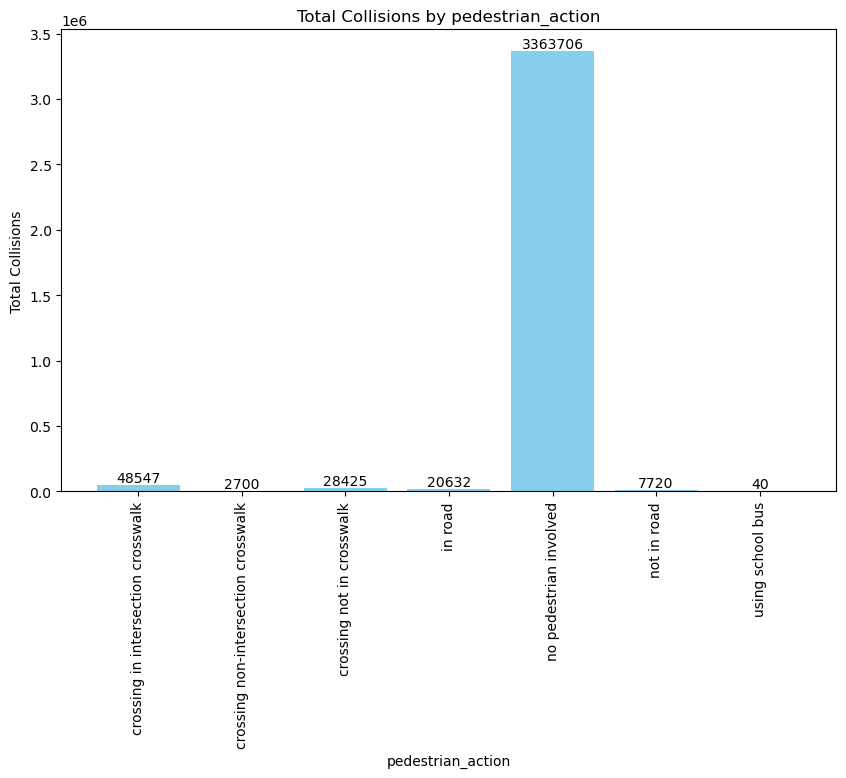

In [30]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

<h3>road_surface values :

In [31]:
column_name = 'road_surface'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

dry         3193023
wet          246627
snowy         10234
slippery       2468
H                97
I                 1
J                 1
Name: road_surface, dtype: int64
---------------------------
null values in road_surface : 19319


In [32]:
value_to_replace = 'dry'
value_to_drop = ['H','I','J']

relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)
relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)

for i in value_to_drop:
    relevant_collisions_data = relevant_collisions_data.drop(relevant_collisions_data[relevant_collisions_data[column_name] == i].index)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

dry         3212342
wet          246627
snowy         10234
slippery       2468
Name: road_surface, dtype: int64
---------------------------
null values in road_surface : 0


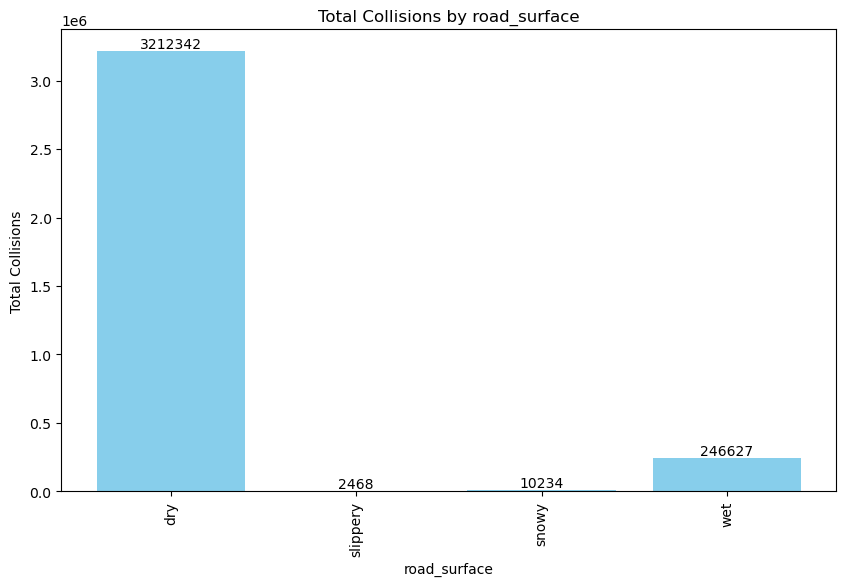

In [33]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

<h3> lighting values :

In [34]:
column_name = 'lighting'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

daylight                                   2258114
dark with street lights                     764995
dark with no street lights                  303270
dusk or dawn                                126676
dark with street lights not functioning       7440
G                                                1
Name: lighting, dtype: int64
---------------------------
null values in lighting : 11175


In [35]:
value_to_replace = 'daylight'
value_to_drop = ['G']

relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)
relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)

for i in value_to_drop:
    relevant_collisions_data = relevant_collisions_data.drop(relevant_collisions_data[relevant_collisions_data[column_name] == i].index)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

daylight                                   2269289
dark with street lights                     764995
dark with no street lights                  303270
dusk or dawn                                126676
dark with street lights not functioning       7440
Name: lighting, dtype: int64
---------------------------
null values in lighting : 0


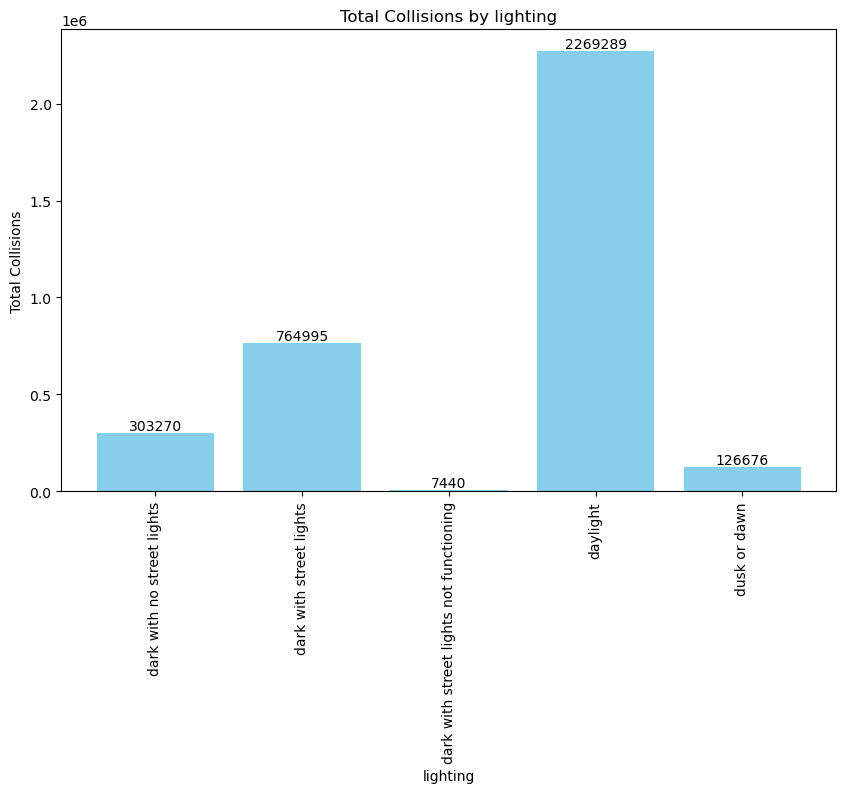

In [36]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

<h3>control_device values :

In [37]:
column_name = 'control_device'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

none               2366312
functioning        1076089
not functioning      10864
obscured              2276
H                        9
E                        3
Q                        1
Name: control_device, dtype: int64
---------------------------
null values in control_device : 16116


In [38]:
value_to_drop = ['H','E','Q']

relevant_collisions_data.dropna(subset=[column_name], inplace=True)

for i in value_to_drop:
    relevant_collisions_data = relevant_collisions_data.drop(relevant_collisions_data[relevant_collisions_data[column_name] == i].index)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

none               2366312
functioning        1076089
not functioning      10864
obscured              2276
Name: control_device, dtype: int64
---------------------------
null values in control_device : 0


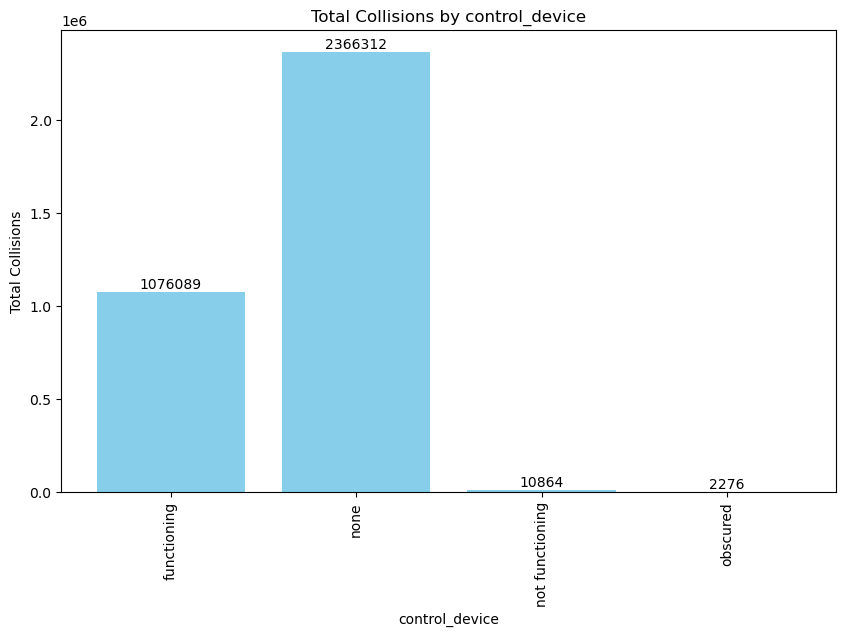

In [39]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(collision_counts.index, collision_counts.values, color='skyblue')
plt.xlabel(f'{column_name}')
plt.ylabel('Total Collisions')
plt.title(f'Total Collisions by {column_name}')
plt.xticks(rotation=90)

# Add count labels on each bar
for i, count in enumerate(collision_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

<h3> alcohol_involved values :

In [40]:
column_name = 'alcohol_involved'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()

print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

1.0    349087
Name: alcohol_involved, dtype: int64
---------------------------
null values in alcohol_involved : 3106454


In [41]:
column_name = 'alcohol_involved'
value_to_replace = 0

relevant_collisions_data[column_name].fillna(value_to_replace, inplace=True)

relevant_collisions_data['alcohol_involved'] = relevant_collisions_data['alcohol_involved'].astype(np.int64)

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

0    3106454
1     349087
Name: alcohol_involved, dtype: int64
---------------------------
null values in alcohol_involved : 0


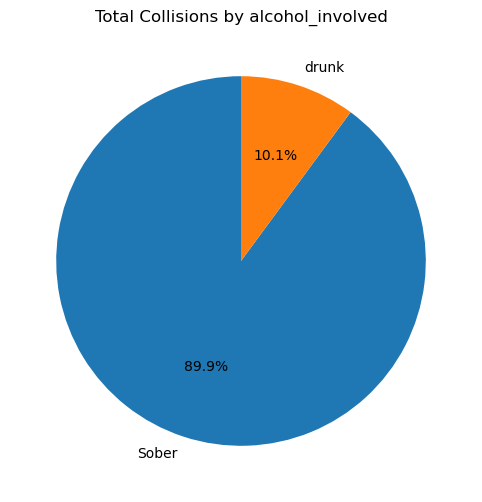

In [42]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
labels = ['Sober' if value == 0 else 'drunk' for value in collision_counts.index]
plt.pie(collision_counts.values, autopct='%1.1f%%', startangle=90,labels = labels)
plt.title(f'Total Collisions by {column_name}')

    
plt.show()

<h3>pedestrian_collision values :

In [43]:
column_name = 'pedestrian_collision'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()

print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

0    3348470
1     107071
Name: pedestrian_collision, dtype: int64
---------------------------
null values in pedestrian_collision : 0


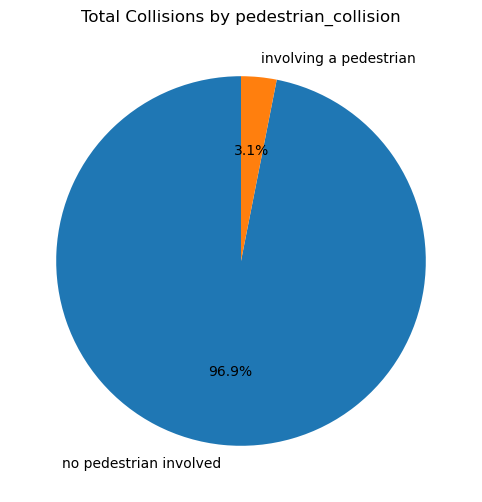

In [44]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
labels = ['no pedestrian involved' if value == 0 else 'involving a pedestrian' for value in collision_counts.index]
plt.pie(collision_counts.values, autopct='%1.1f%%', startangle=90,labels = labels)
plt.title(f'Total Collisions by {column_name}')

    
plt.show()

<h3>motorcycle_collision values :

In [45]:
column_name = 'motorcycle_collision'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()

print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

0    3330927
1     124614
Name: motorcycle_collision, dtype: int64
---------------------------
null values in motorcycle_collision : 0


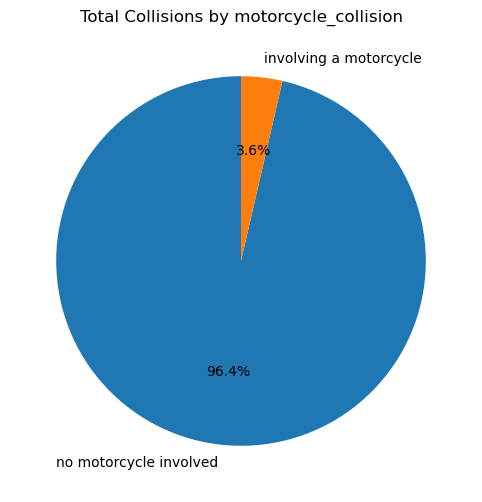

In [46]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
labels = ['no motorcycle involved' if value == 0 else 'involving a motorcycle' for value in collision_counts.index]
plt.pie(collision_counts.values, autopct='%1.1f%%', startangle=90,labels = labels)
plt.title(f'Total Collisions by {column_name}')

    
plt.show()

<h3>truck_collision values :

In [47]:
column_name = 'truck_collision'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()

print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

0    3252209
1     203332
Name: truck_collision, dtype: int64
---------------------------
null values in truck_collision : 0


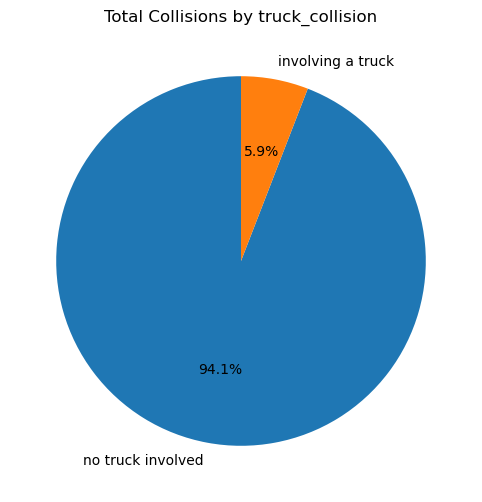

In [48]:
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
labels = ['no truck involved' if value == 0 else 'involving a truck' for value in collision_counts.index]
plt.pie(collision_counts.values, autopct='%1.1f%%', startangle=90,labels = labels)
plt.title(f'Total Collisions by {column_name}')

    
plt.show()

<h3>collision_time values :

In [49]:
column_name = 'collision_time'

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()

print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')

16:00:00    21443
17:30:00    21088
17:00:00    21021
18:00:00    20718
15:00:00    20619
            ...  
03:51:00      284
04:11:00      281
03:59:00      281
04:29:00      277
04:31:00      270
Name: collision_time, Length: 1440, dtype: int64
---------------------------
null values in collision_time : 32500


In this code, the groupby('lighting') groups the data by the lighting column. The transform() function applies the fillna() method on each group separately. The lambda function inside transform() fills the NaN values in collision_time for each group with the mode value (x.mode()[0]), which represents the most frequent value in that group.

In [50]:
relevant_collisions_data['collision_time'] = relevant_collisions_data.groupby('lighting')['collision_time'].transform(lambda x: x.fillna(x.mode()[0]))

value_count = value_count = relevant_collisions_data[column_name].value_counts()
null_value = relevant_collisions_data[column_name].isnull().sum()
print(value_count)
print('---------------------------')
print(f'null values in {column_name} : {null_value}')


16:00:00    34850
21:00:00    28144
17:30:00    21088
17:00:00    21021
18:00:00    20718
            ...  
03:51:00      284
04:11:00      281
03:59:00      281
04:29:00      277
04:31:00      270
Name: collision_time, Length: 1440, dtype: int64
---------------------------
null values in collision_time : 0


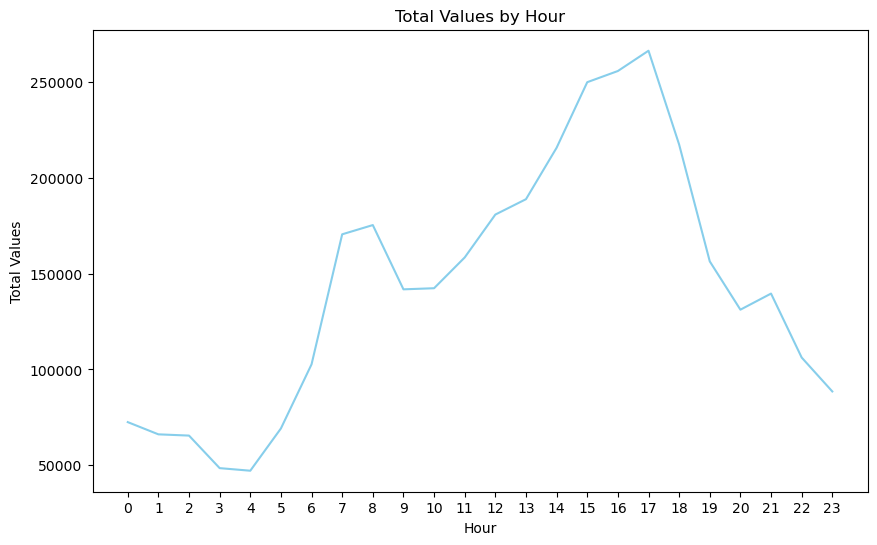

In [51]:
# Convert collision_time to datetime format
relevant_collisions_data['collision_time'] = pd.to_datetime(relevant_collisions_data['collision_time'])

# Extract the hour component from collision_time
relevant_collisions_data['hour'] = relevant_collisions_data['collision_time'].dt.hour

# Calculate the total values for each hour
hourly_counts = relevant_collisions_data['hour'].value_counts().sort_index()

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Total Values')
plt.title('Total Values by Hour')
plt.xticks(range(24))
plt.show()

In [52]:
relevant_collisions_data.isnull().sum()

population                     0
weather_1                      0
collision_severity             0
killed_victims                 0
injured_victims                0
primary_collision_factor       0
pcf_violation_category         0
type_of_collision              0
motor_vehicle_involved_with    0
pedestrian_action              0
road_surface                   0
lighting                       0
control_device                 0
pedestrian_collision           0
motorcycle_collision           0
truck_collision                0
alcohol_involved               0
collision_date                 0
collision_time                 0
hour                           0
dtype: int64

# Checking the distribution of the data

In [112]:
num_attributes = len(relevant_columns)//2

midpoint = len(relevant_columns) // 2

first_half = relevant_columns[:midpoint]
second_half = relevant_columns[midpoint:]

nrow = (num_attributes + 1) // 2  
ncol = 2  

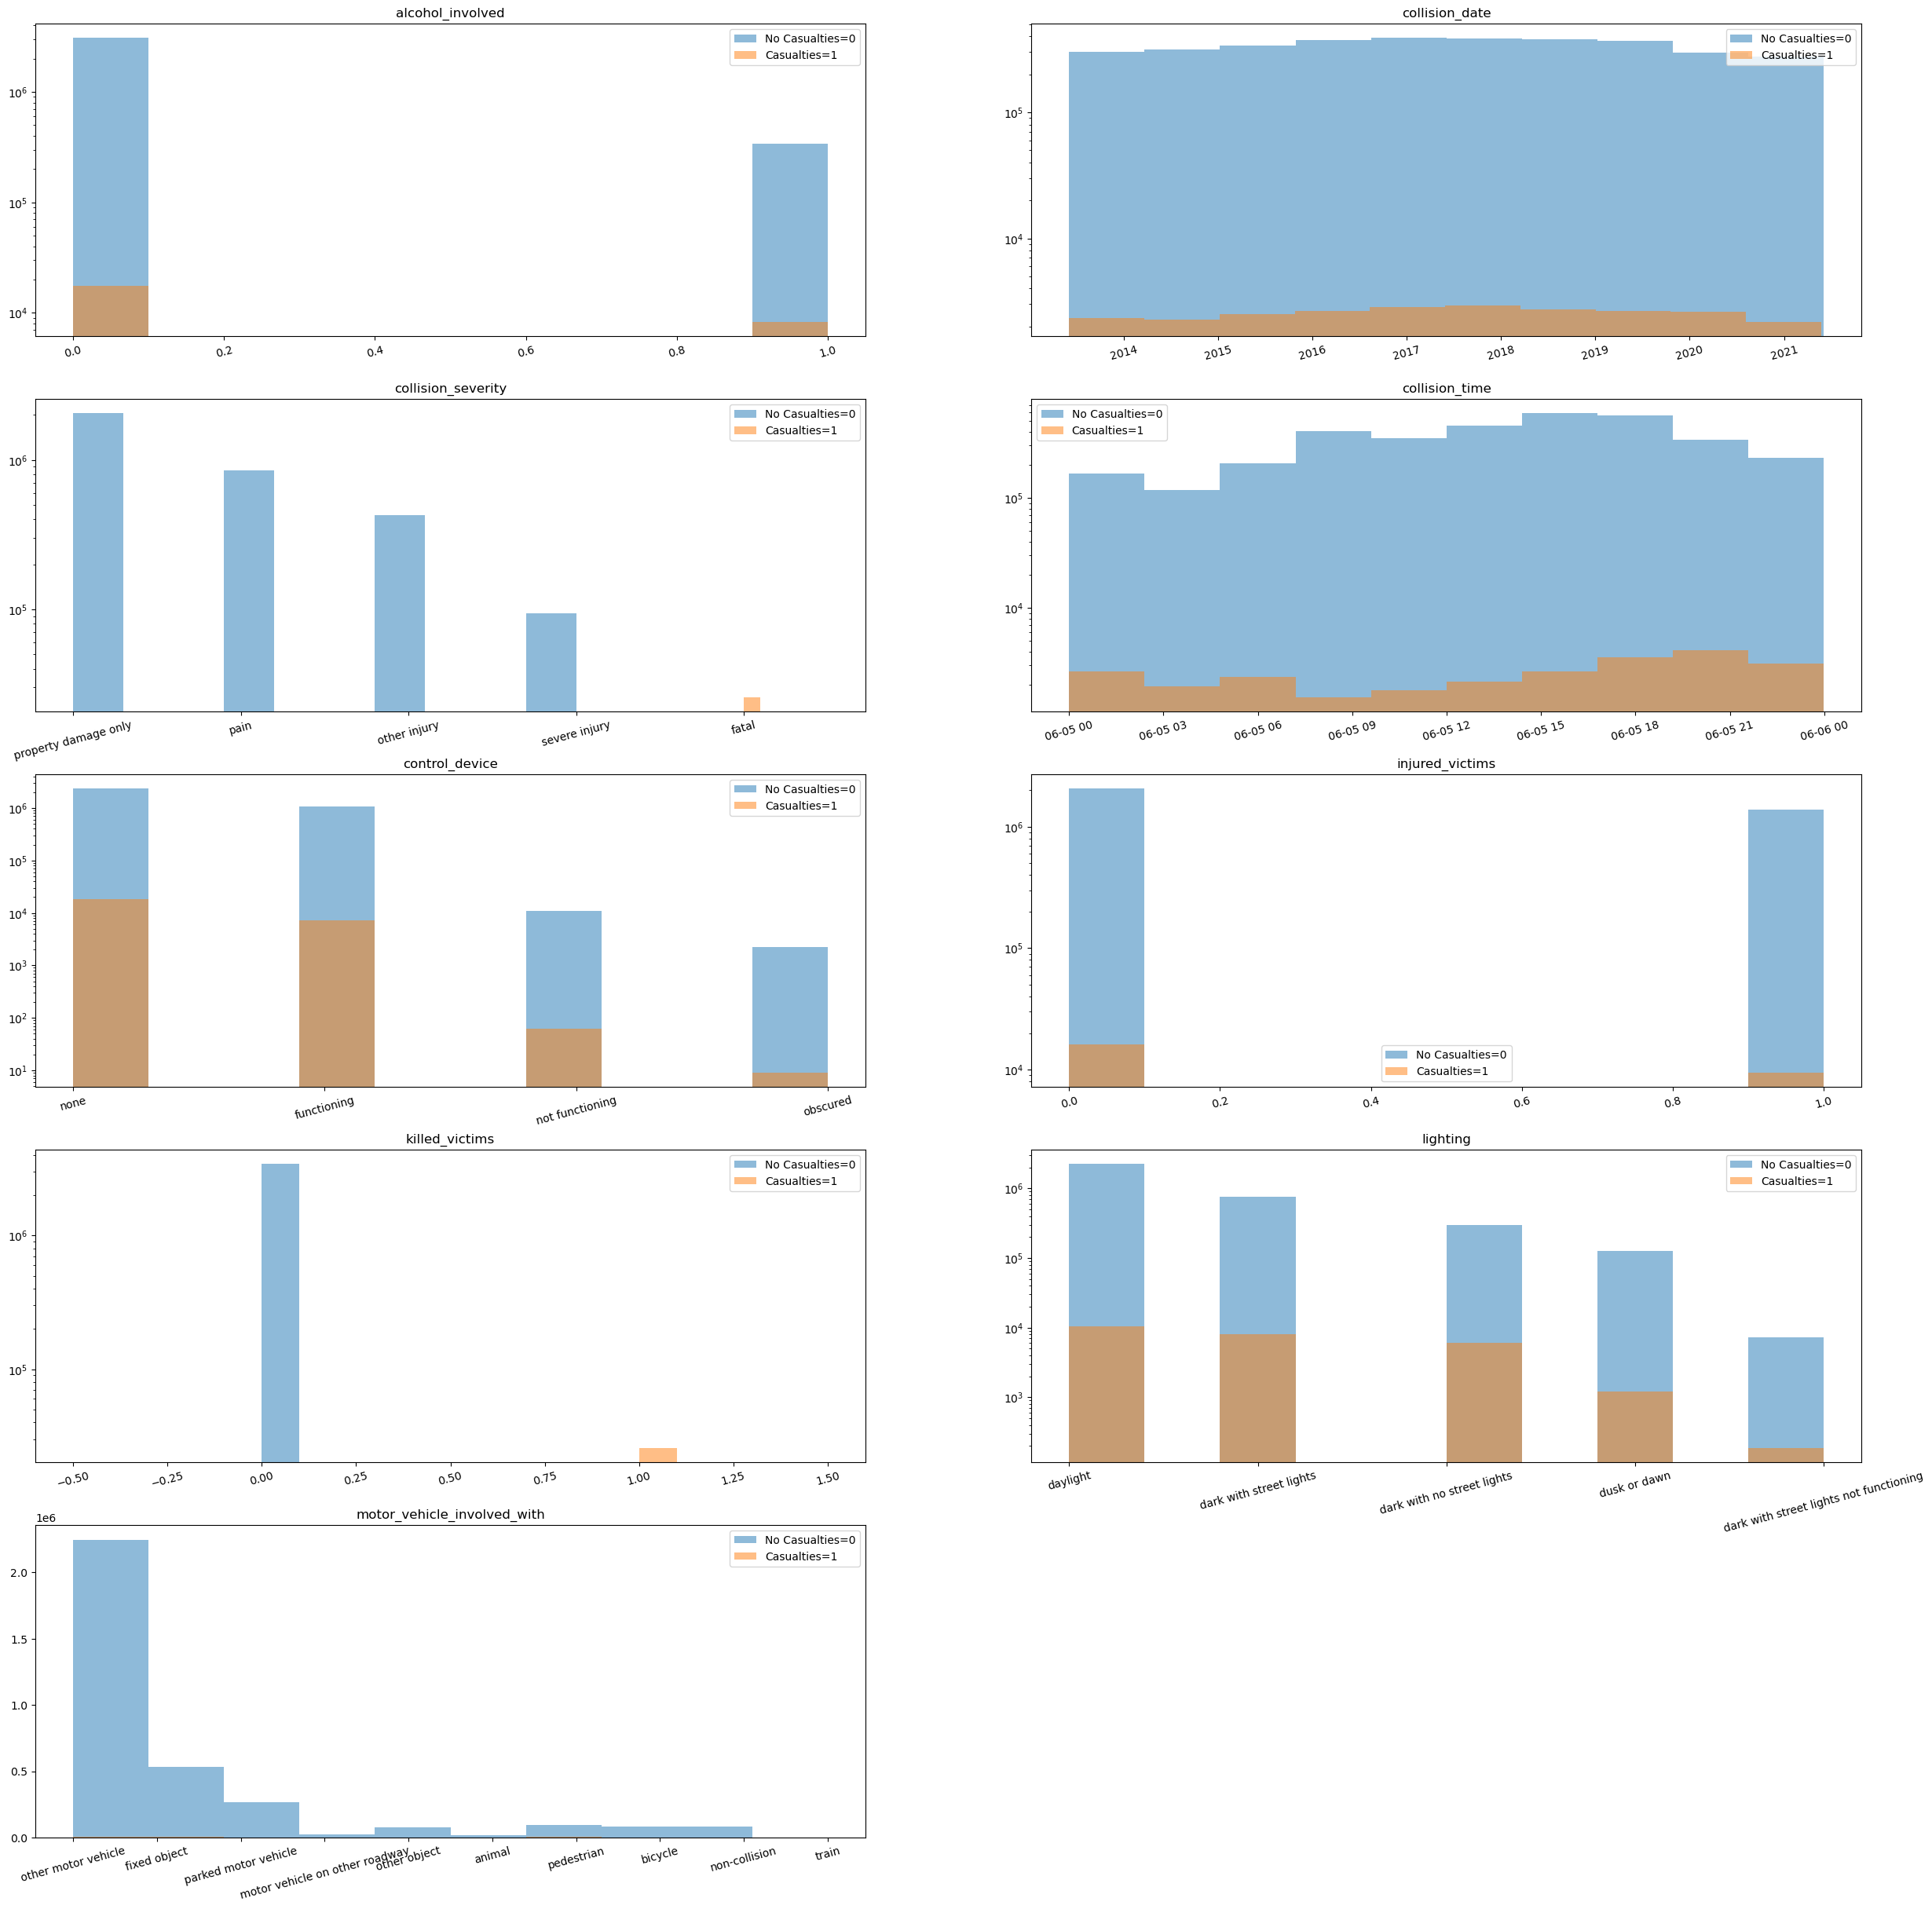

In [113]:
fig = plt.figure(figsize=(30, 30))
fig.tight_layout(pad=5.0, h_pad=3.0)

for index, attribute in enumerate(first_half):
    plt.yscale('log')
    plt.subplot(nrow, ncol, index + 1)
    plt.title(attribute)
    plt.hist(relevant_collisions_data[attribute][relevant_collisions_data.killed_victims == 0],
             alpha=0.5, label="No Casualties=0")
    plt.hist(relevant_collisions_data[attribute][relevant_collisions_data.killed_victims == 1],
             alpha=0.5, label="Casualties=1")
    plt.legend(loc="best")
    plt.xticks(rotation=15)
    
plt.show()

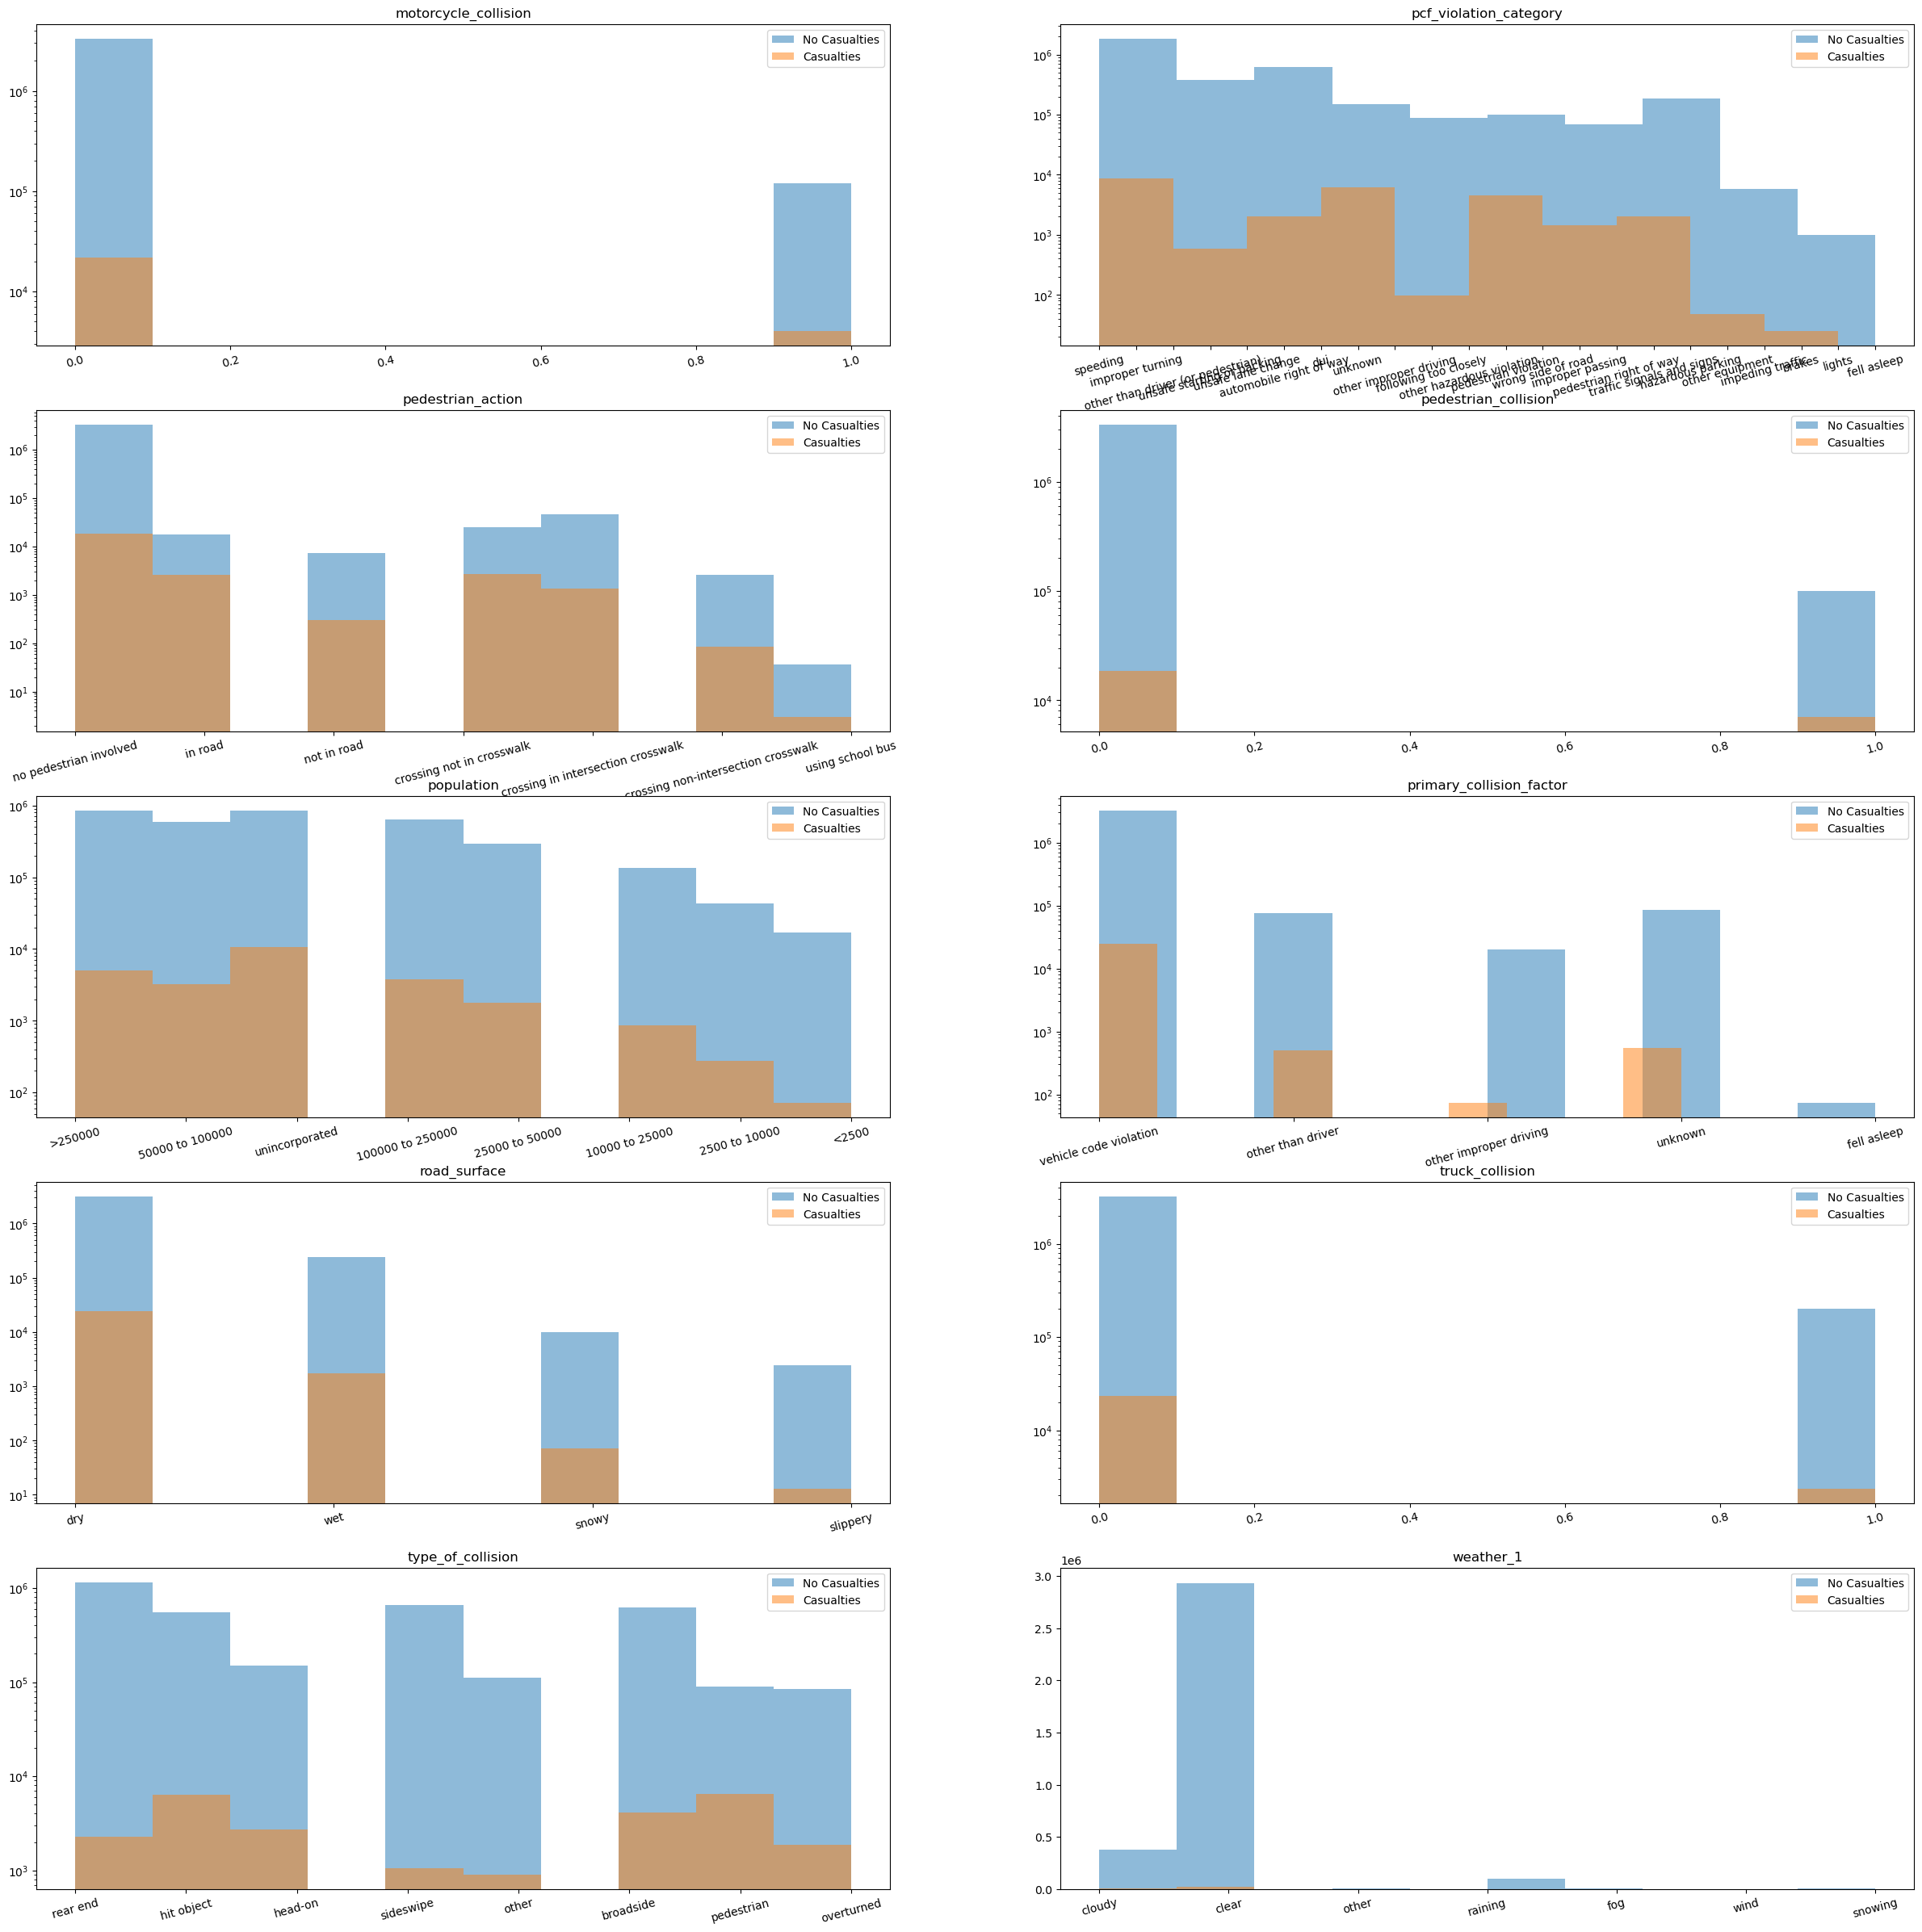

In [114]:
fig = plt.figure(figsize=(30, 30))
fig.tight_layout(pad=5.0, h_pad=3.0)

for index, attribute in enumerate(second_half):
    plt.yscale('log')
    plt.subplot(nrow, ncol, index + 1)
    plt.title(attribute)
    plt.hist(relevant_collisions_data[attribute][relevant_collisions_data.killed_victims == 0],
             alpha=0.5, label="No Casualties")
    plt.hist(relevant_collisions_data[attribute][relevant_collisions_data.killed_victims == 1],
             alpha=0.5, label="Casualties")
    plt.legend(loc="best")
    plt.xticks(rotation=15)
plt.show()

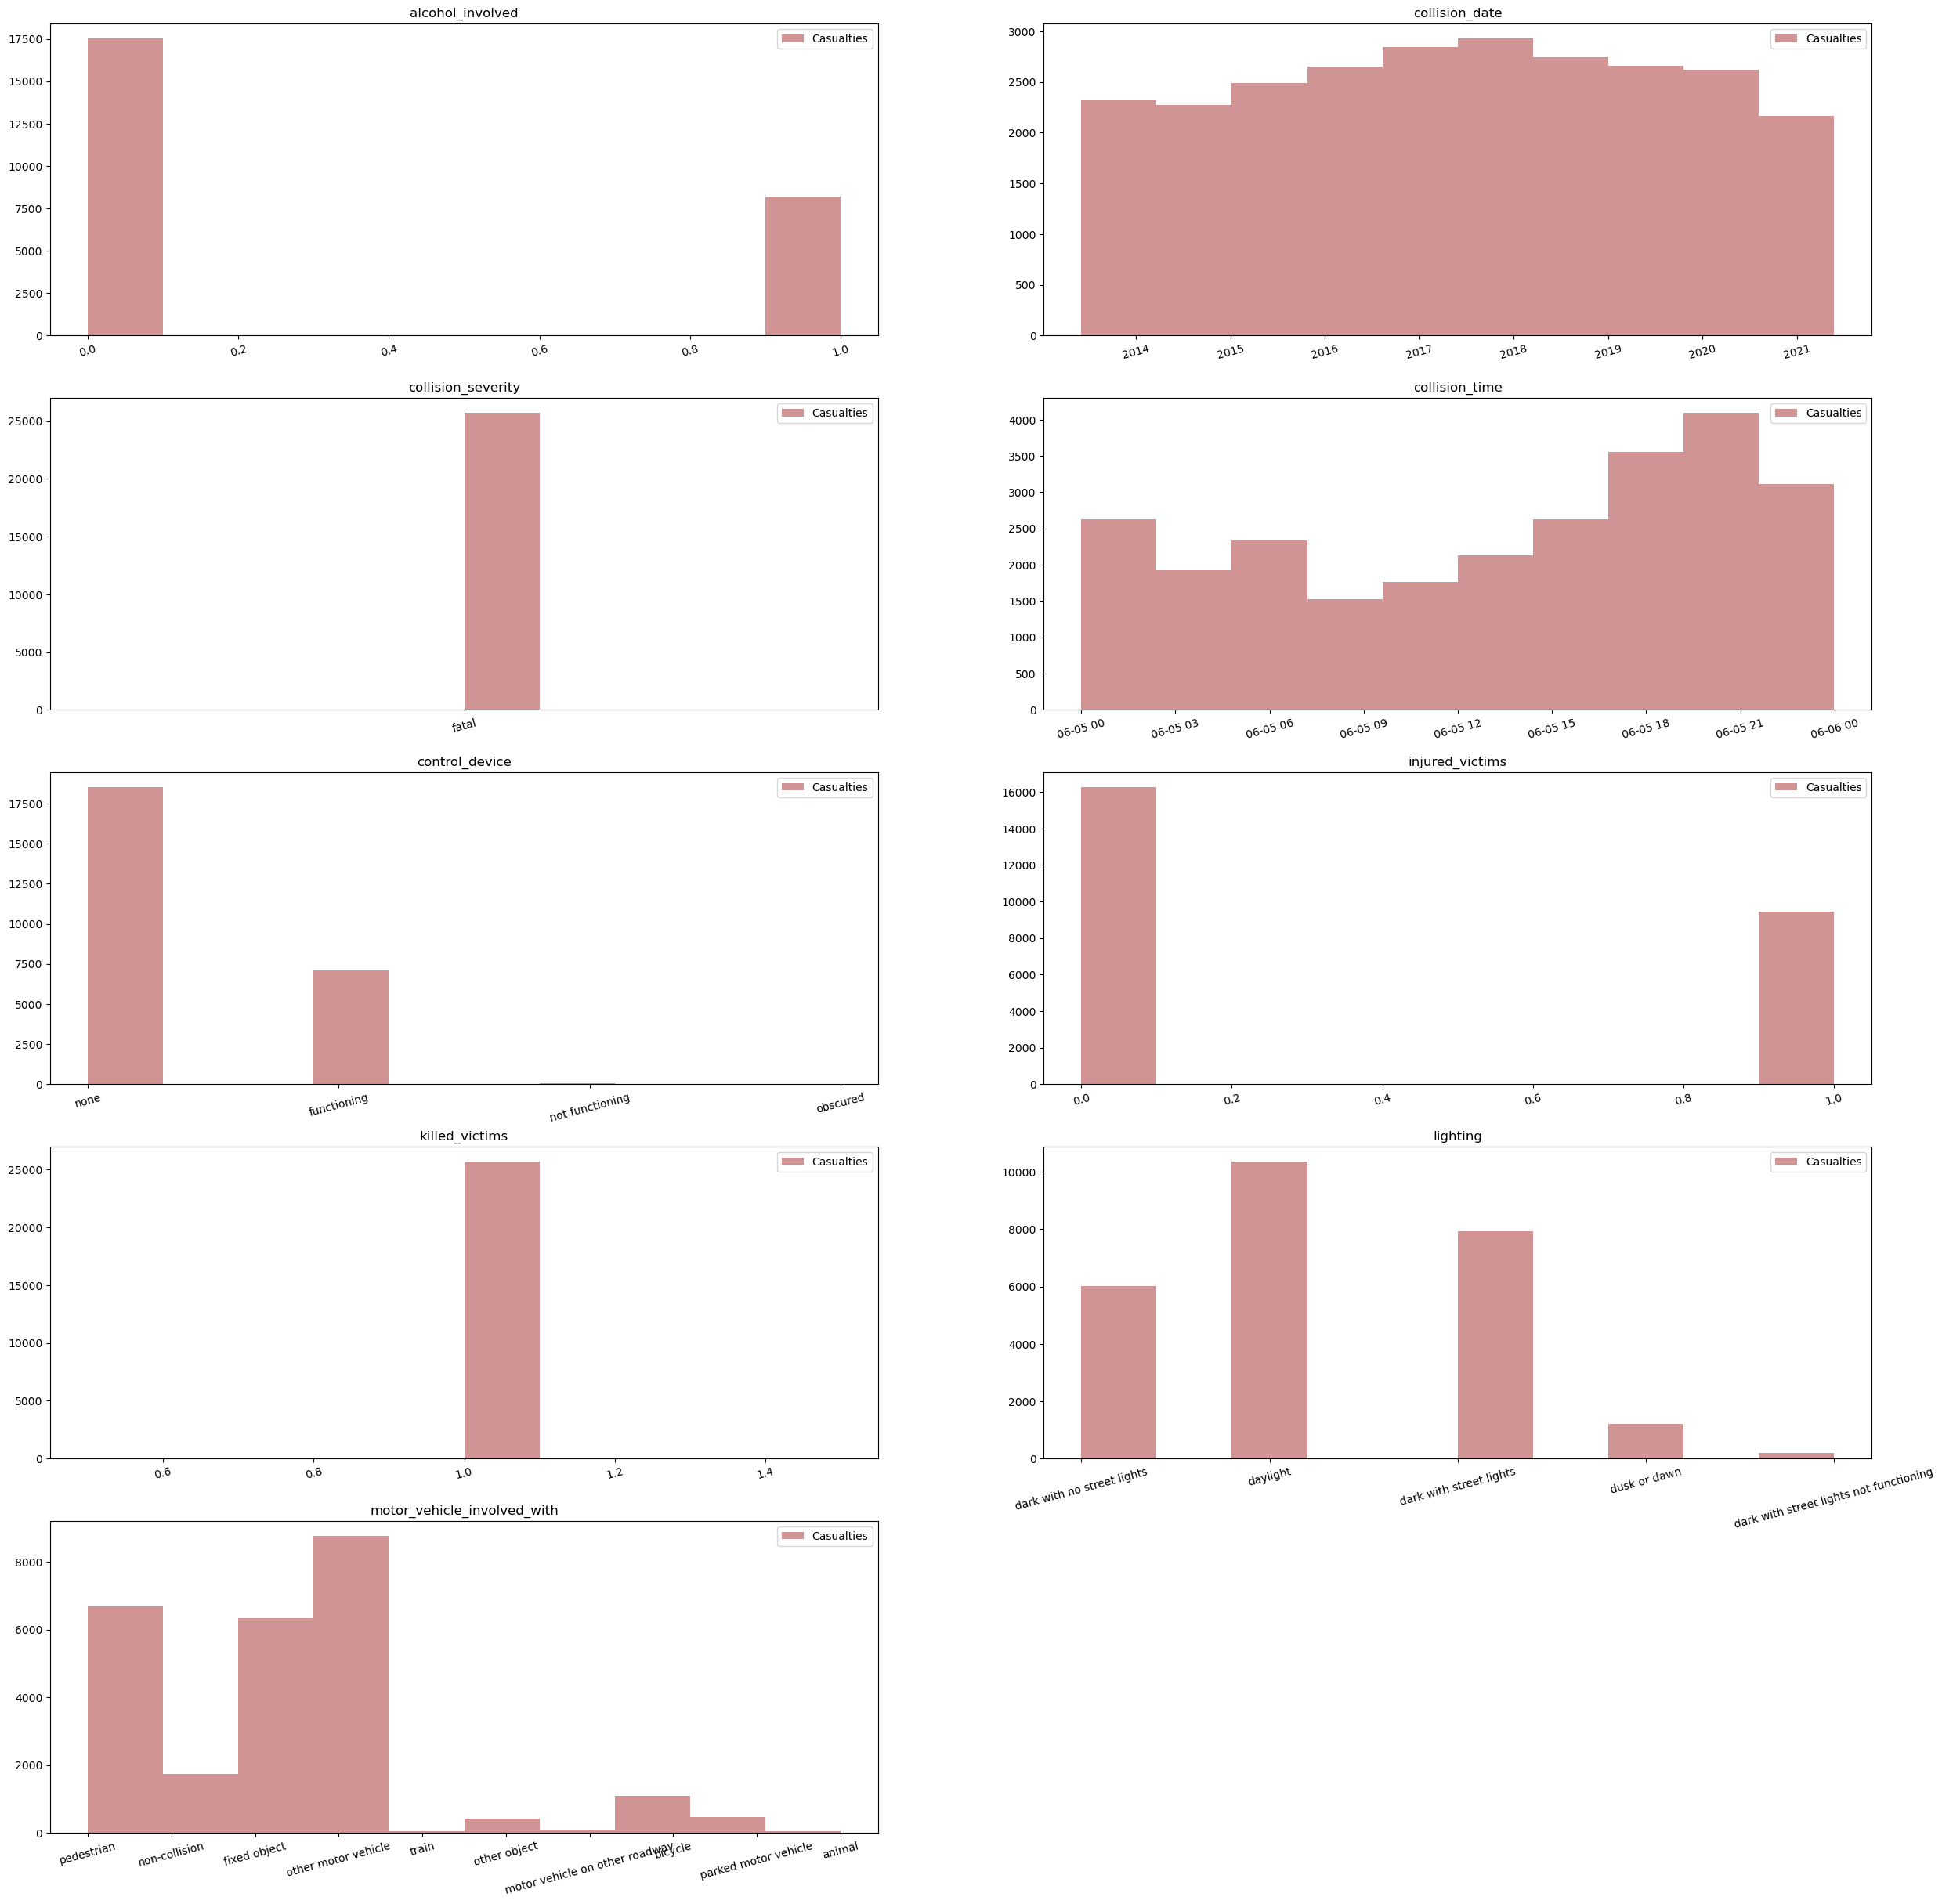

In [115]:
fig = plt.figure(figsize=(30, 30))
fig.tight_layout(pad=5.0, h_pad=3.0)

for index, attribute in enumerate(first_half):
    plt.subplot(nrow, ncol, index + 1)
    plt.title(attribute)
    plt.hist(relevant_collisions_data[attribute][relevant_collisions_data.killed_victims == 1],
             alpha=0.5, label="Casualties",color='brown')
    plt.legend(loc="best")
    plt.xticks(rotation=15)
plt.show()

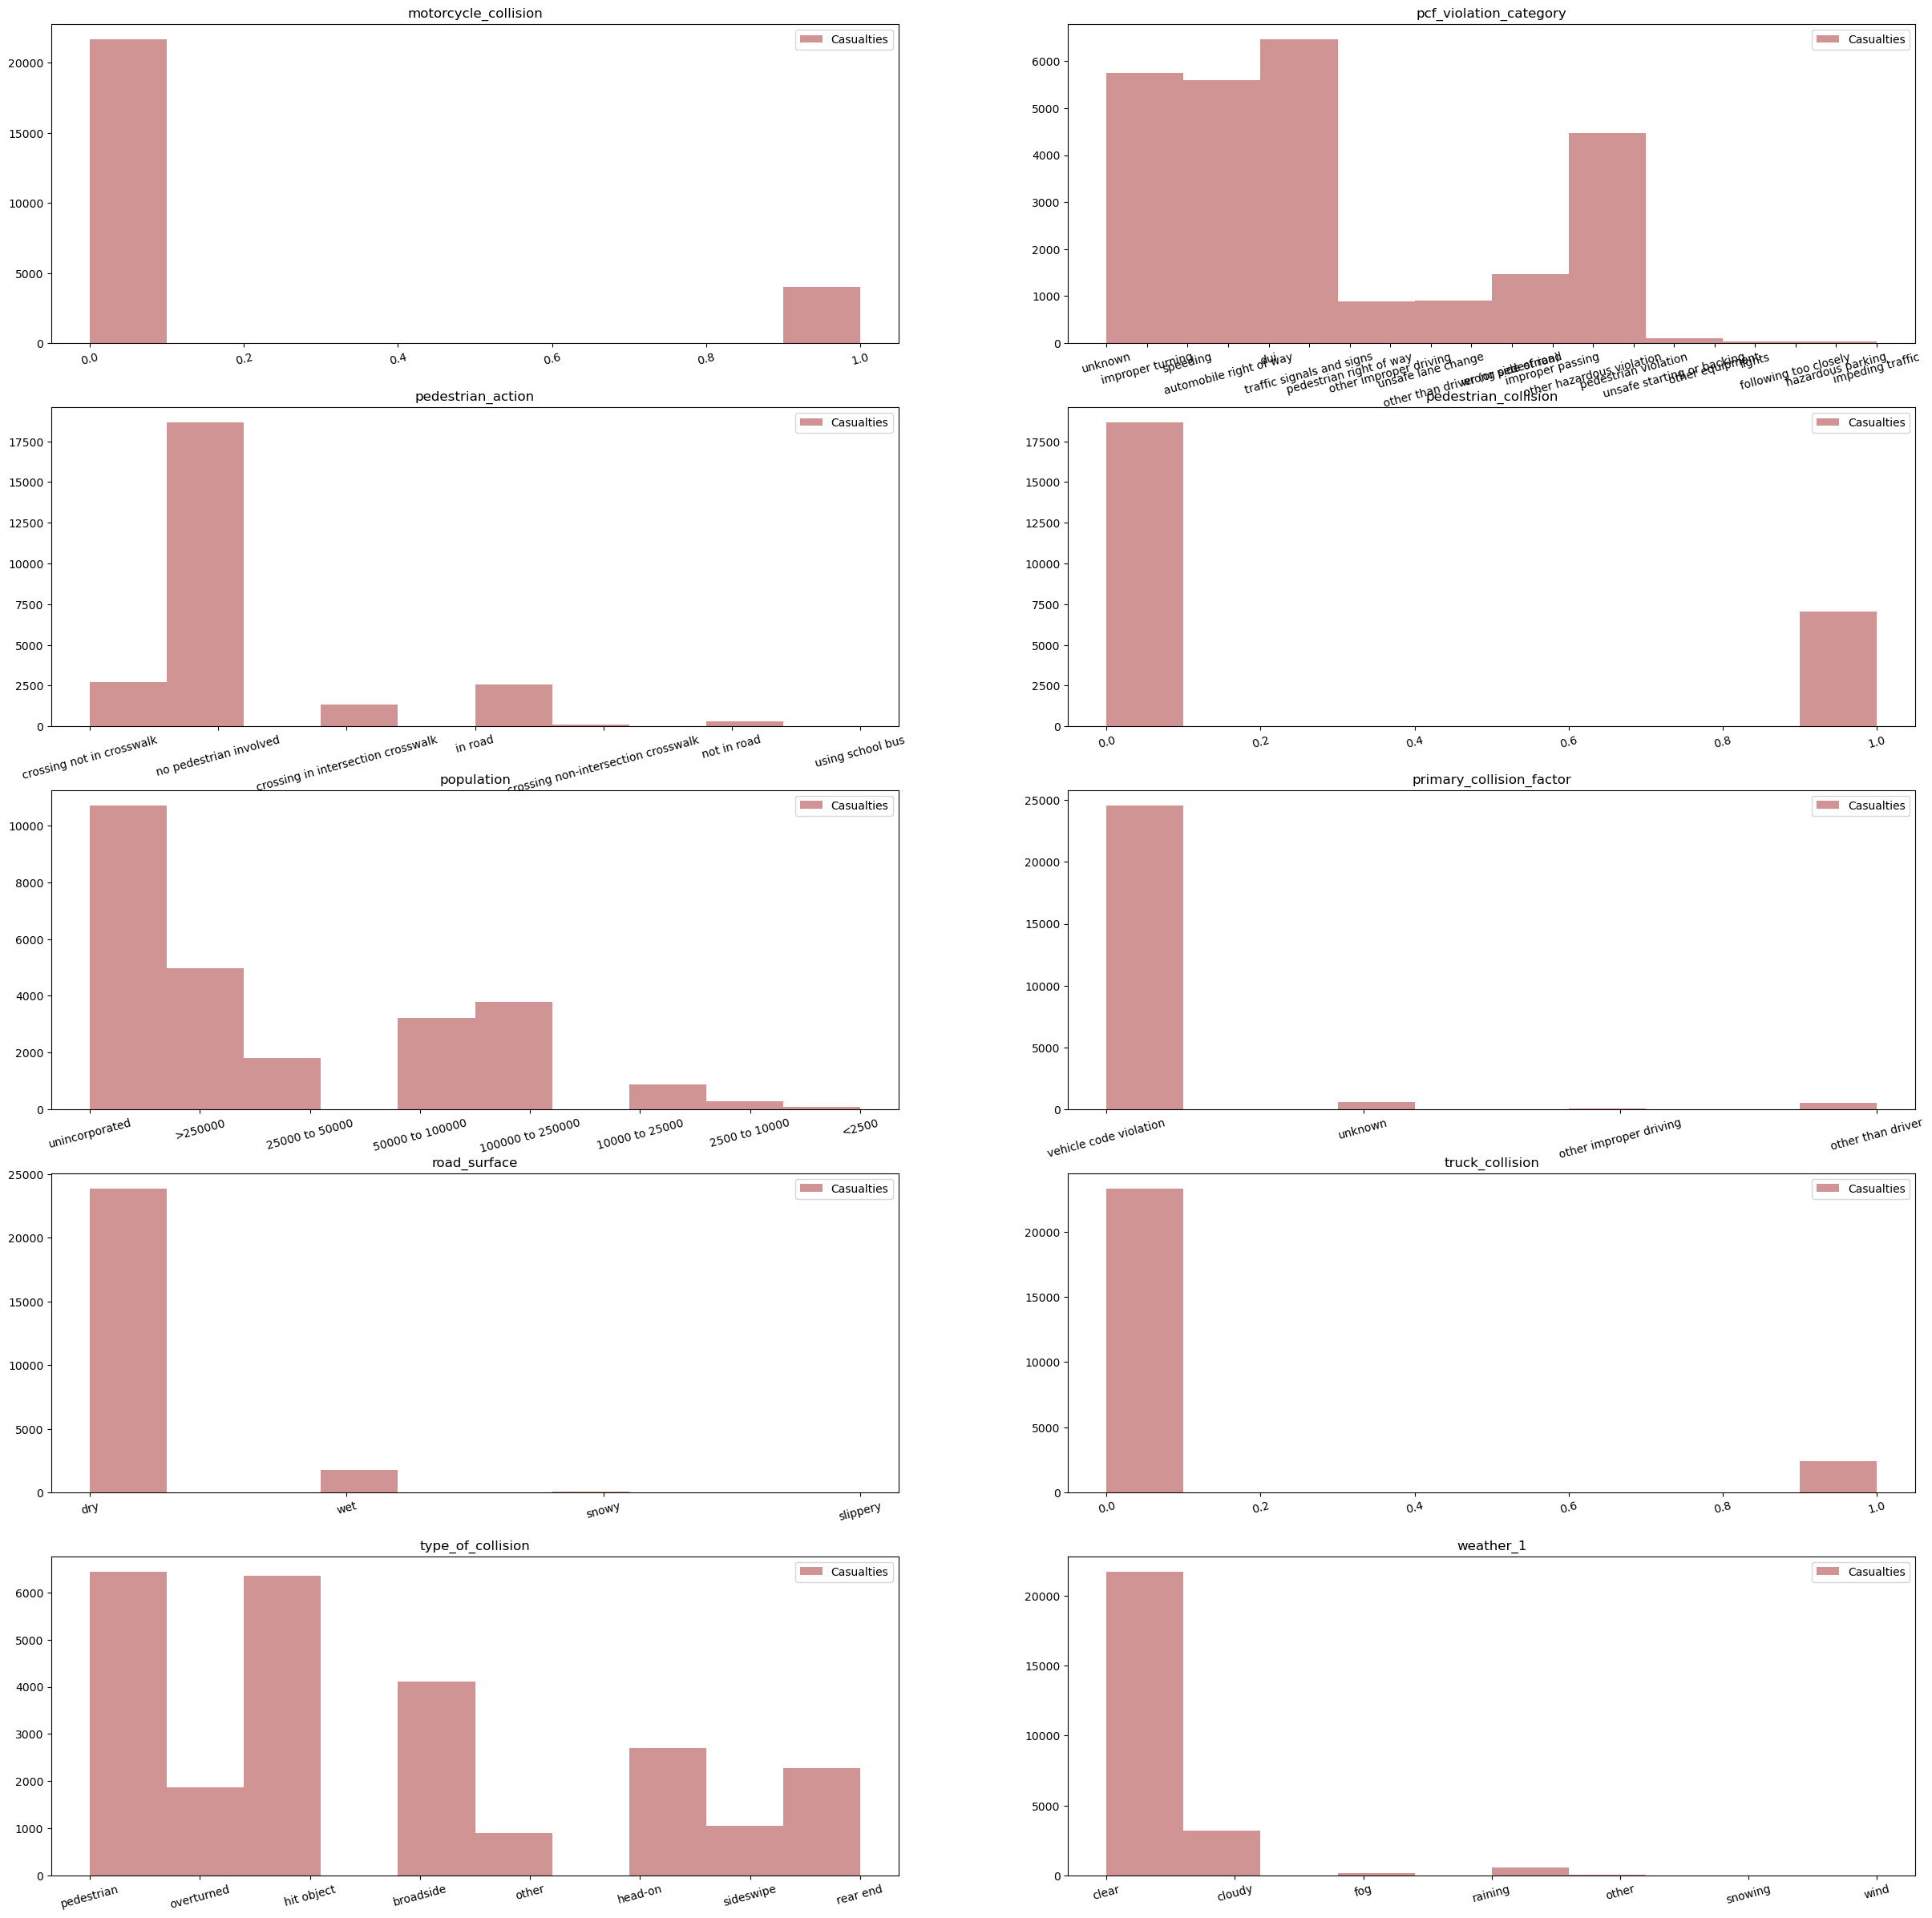

In [116]:
fig = plt.figure(figsize=(30, 30))
fig.tight_layout(pad=5.0, h_pad=3.0)

for index, attribute in enumerate(second_half):
    plt.subplot(nrow, ncol, index + 1)
    plt.title(attribute)
    plt.hist(relevant_collisions_data[attribute][relevant_collisions_data.killed_victims == 1],
             alpha=0.5, label="Casualties",color='brown')
    plt.legend(loc="best")
    plt.xticks(rotation=15)
plt.show()

# converting categorical data  into numerical data for further processing

The datasets have both numerical and categorical features. Categorical features refer to string data types and can be easily understood by human beings. However, machines cannot interpret the categorical data directly. Therefore, the categorical data must be converted into numerical data for further processing.

In [143]:
relevant_collisions_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455541 entries, 0 to 3492835
Data columns (total 20 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   population                   object        
 1   weather_1                    object        
 2   collision_severity           object        
 3   killed_victims               int64         
 4   injured_victims              int64         
 5   primary_collision_factor     object        
 6   pcf_violation_category       object        
 7   type_of_collision            object        
 8   motor_vehicle_involved_with  object        
 9   pedestrian_action            object        
 10  road_surface                 object        
 11  lighting                     object        
 12  control_device               object        
 13  pedestrian_collision         int64         
 14  motorcycle_collision         int64         
 15  truck_collision              int64         
 16  

In [53]:

columns_to_encode = [
    'population',
    'weather_1',
    'collision_severity',
    'primary_collision_factor',
    'pcf_violation_category',
    'type_of_collision',
    'motor_vehicle_involved_with',
    'pedestrian_action',
    'road_surface',
    'lighting',
    'control_device'
]

for atribute in columns_to_encode :
    # Create a DataFrame with the weather column
    data_to_convert = relevant_collisions_data[atribute]

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Perform label encoding on the weather column
    encoded_data = label_encoder.fit_transform(data_to_convert)
    
    # Convert the encoded data to 64-bit integer type
    encoded_data = encoded_data.astype(np.int64)

    # Overwrite the original column with the encoded values
    relevant_collisions_data[atribute] = encoded_data


In [54]:
relevant_collisions_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455541 entries, 0 to 3492835
Data columns (total 20 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   population                   int64         
 1   weather_1                    int64         
 2   collision_severity           int64         
 3   killed_victims               int64         
 4   injured_victims              int64         
 5   primary_collision_factor     int64         
 6   pcf_violation_category       int64         
 7   type_of_collision            int64         
 8   motor_vehicle_involved_with  int64         
 9   pedestrian_action            int64         
 10  road_surface                 int64         
 11  lighting                     int64         
 12  control_device               int64         
 13  pedestrian_collision         int64         
 14  motorcycle_collision         int64         
 15  truck_collision              int64         
 16  

# Treatment of Outliers

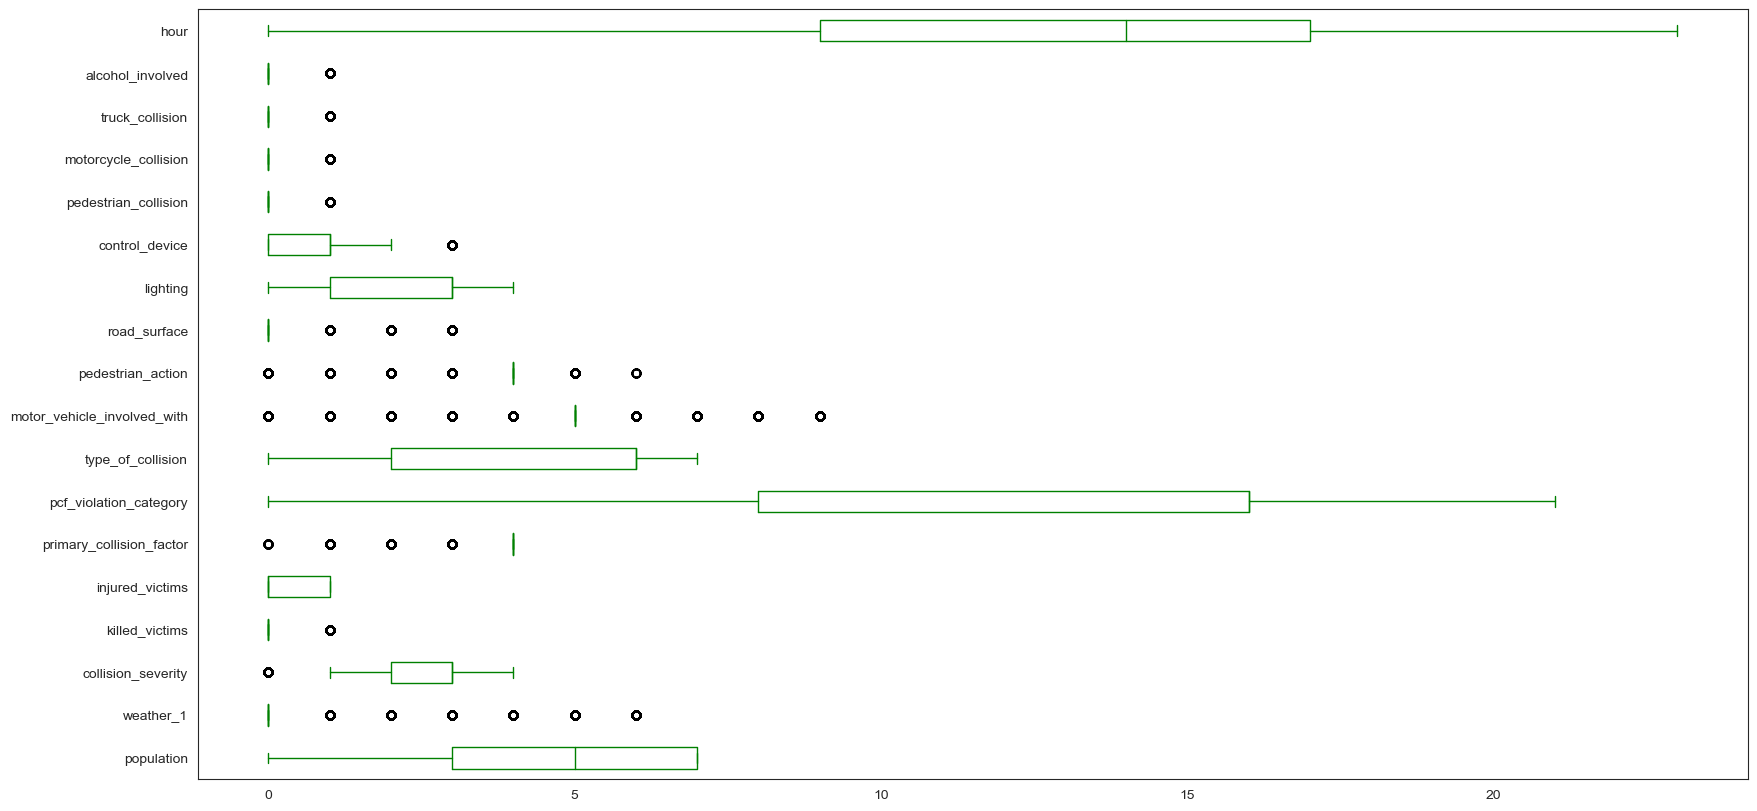

In [150]:
relevant_collisions_data.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

my data doesn't have any outliners

# Explorning data to know relation before processing

In [151]:
#Pearson Correlation Cofficient
corr_matrix = relevant_collisions_data.corr()
corr_matrix

,population,weather_1,collision_severity,killed_victims,injured_victims,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,lighting,control_device,pedestrian_collision,motorcycle_collision,truck_collision,alcohol_involved,hour
population,1.000000,0.018777,-0.012393,0.020382,0.024631,-0.003732,-0.015796,-0.018632,-0.079935,0.007386,0.032022,-0.051191,0.123653,-0.003475,0.022353,0.021879,-0.008222,-0.008728
weather_1,0.018777,1.000000,0.013615,-0.000944,-0.015239,0.003265,0.016004,-0.040402,-0.062178,-0.003756,0.701999,-0.060086,0.019937,-0.000325,-0.031421,0.000643,-0.005805,-0.042389
collision_severity,-0.012393,0.013615,1.000000,-0.281525,-0.738328,-0.041890,0.071858,0.150747,0.022536,0.134035,0.015248,-0.030022,0.107304,-0.154686,-0.108985,0.056166,-0.018176,-0.013495
killed_victims,0.020382,-0.000944,-0.281525,1.000000,-0.005941,0.003912,-0.016064,-0.032689,0.011450,-0.074305,-0.001278,-0.047077,0.006146,0.121188,0.056108,0.012333,0.062475,-0.003266
injured_victims,0.024631,-0.015239,-0.738328,-0.005941,1.000000,0.055455,-0.076153,-0.175044,-0.011614,-0.158752,-0.016495,0.040982,-0.138927,0.182113,0.160852,-0.075458,0.005821,0.024525
primary_collision_factor,-0.003732,0.003265,-0.041890,0.003912,0.055455,1.000000,-0.081257,0.056390,0.042808,-0.014768,0.011489,0.020128,-0.042609,-0.003827,0.001996,-0.017677,0.050292,0.002472
pcf_violation_category,-0.015796,0.016004,0.071858,-0.016064,-0.076153,-0.081257,1.000000,0.342399,0.111319,-0.056846,0.014721,0.088261,0.058927,0.063509,-0.009227,0.060974,-0.320586,0.005952
type_of_collision,-0.018632,-0.040402,0.150747,-0.032689,-0.175044,0.056390,0.342399,1.000000,0.327858,-0.035129,-0.056006,0.040023,0.206386,0.040234,-0.017003,0.098456,-0.036420,0.023804
motor_vehicle_involved_with,-0.079935,-0.062178,0.022536,0.011450,-0.011614,0.042808,0.111319,0.327858,1.000000,-0.319659,-0.086920,0.073443,-0.050336,0.364599,-0.013916,0.021951,-0.054942,0.060302
pedestrian_action,0.007386,-0.003756,0.134035,-0.074305,-0.158752,-0.014768,-0.056846,-0.035129,-0.319659,1.000000,-0.001210,0.012967,0.112888,-0.848370,0.023959,0.031527,-0.001590,-0.025903


It is clear from the above co-relation result that collision severity is the most important feature

In [152]:
mask = np.zeros_like(corr_matrix)
traingle_indices=np.triu_indices_from(mask)
mask[traingle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0

<h3>Heatmap for the data :

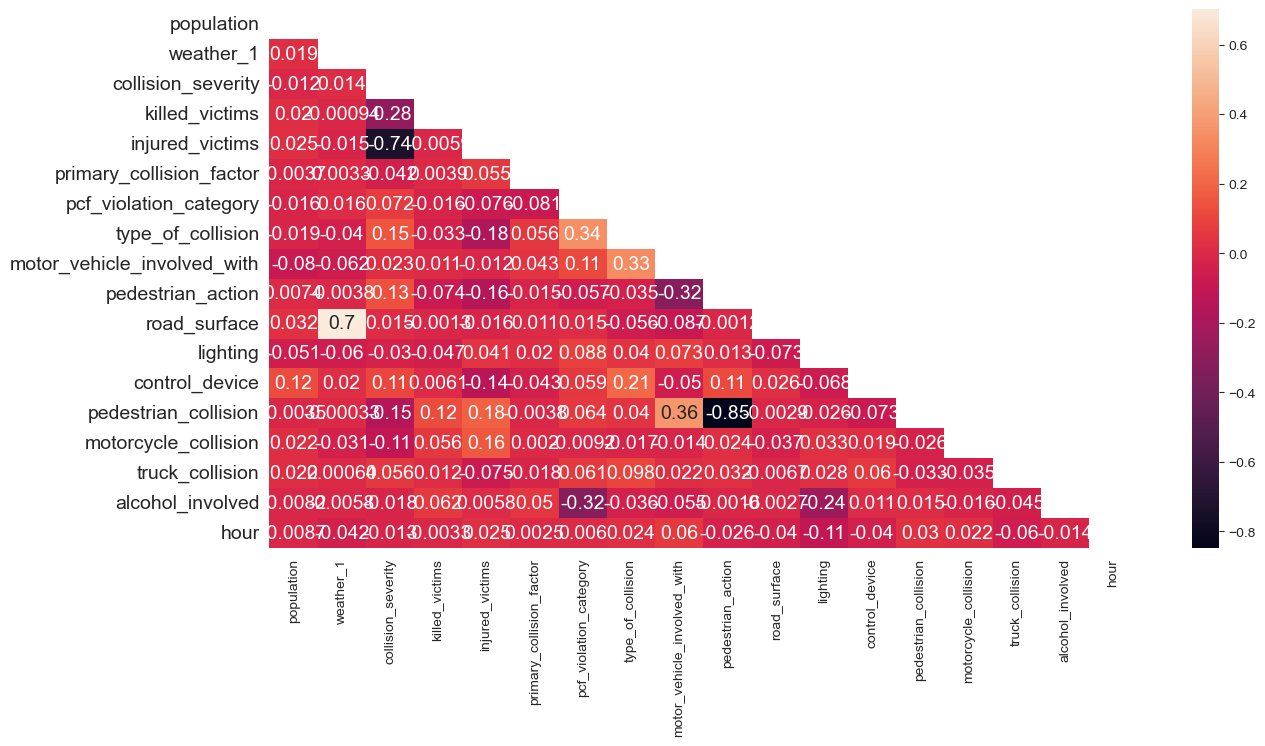

In [155]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix,mask=mask, annot=True, annot_kws={"size" : 14})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.show()

The heatmap indicates that the brighter the colors the higher the correlation and vice versa.

# Using knn to predict the fatal cases

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select the features to use for prediction
features = ['population', 'weather_1', 'collision_severity', 'primary_collision_factor',
            'pcf_violation_category', 'type_of_collision', 'motor_vehicle_involved_with',
            'pedestrian_action', 'road_surface', 'lighting', 'control_device']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(relevant_collisions_data[features],
                                                    relevant_collisions_data['killed_victims'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.0009967168710000877
R2 Score: 0.8675627341582498


# balancing the dataset

is it's clear in the pie chart my data set is extreamly bias.

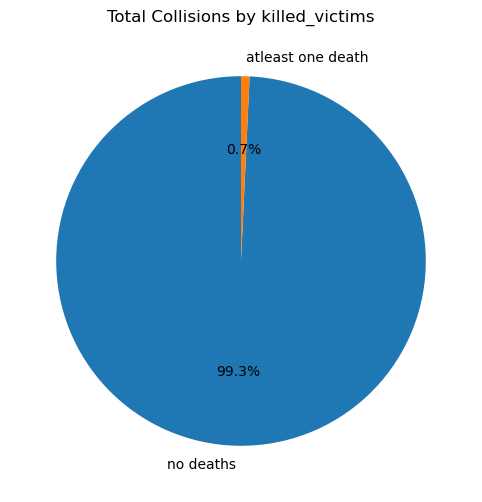

In [55]:
column_name = 'killed_victims'
collision_counts = relevant_collisions_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
labels = ['no deaths' if value == 0 else 'atleast one death' for value in collision_counts.index]
plt.pie(collision_counts.values, autopct='%1.1f%%', startangle=90,labels = labels)
plt.title(f'Total Collisions by {column_name}')

    
plt.show()

<h3>creating a balanced dataset

In [56]:
data_0 = relevant_collisions_data[relevant_collisions_data['killed_victims'] == 0]  
data_1 = relevant_collisions_data[relevant_collisions_data['killed_victims'] == 1]  

# Determine the size of the smaller subset
n = min(len(data_0), len(data_1))

# Randomly sample 'n' instances from each subset
data_0_balanced = data_0.sample(n)
data_1_balanced = data_1.sample(n)

# Concatenate the balanced subsets to create the final balanced dataset
balanced_data = pd.concat([data_0_balanced, data_1_balanced])

# Print the shape of the balanced dataset
print("Balanced Dataset Shape:", balanced_data.shape)

Balanced Dataset Shape: (51428, 20)


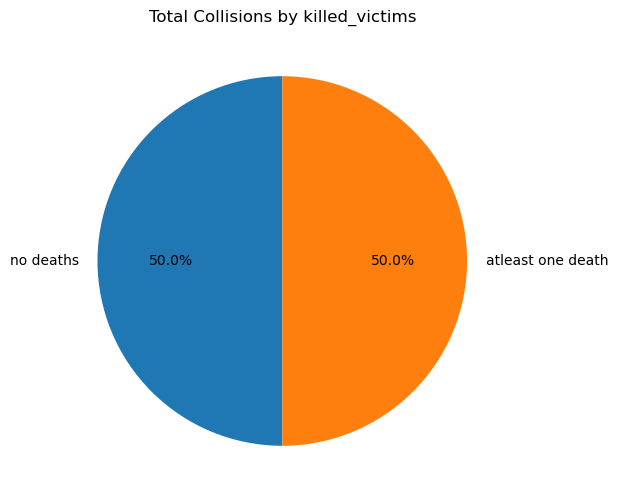

In [57]:
column_name = 'killed_victims'
collision_counts = balanced_data[column_name].value_counts().sort_index()

# Create bar graph
plt.figure(figsize=(10, 6))
labels = ['no deaths' if value == 0 else 'atleast one death' for value in collision_counts.index]
plt.pie(collision_counts.values, autopct='%1.1f%%', startangle=90,labels = labels)
plt.title(f'Total Collisions by {column_name}')

    
plt.show()

In [58]:
balanced_data.to_csv('balanced_data.csv', index=False)

# Using knn to predict the fatal cases with the balanced dataset

In [59]:
# Specify the path to your CSV file
csv_file_path = "balanced_data.csv"

# Read the CSV file and select only the relevant columns
balanced_data = pd.read_csv(csv_file_path)

# Display the resulting DataFrame
balanced_data.head()

,population,weather_1,collision_severity,killed_victims,injured_victims,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,lighting,control_device,pedestrian_collision,motorcycle_collision,truck_collision,alcohol_involved,collision_date,collision_time,hour
0,7,0,1,0,1,4,14,5,8,0,0,1,0,1,0,0,0,2018-12-22,2023-06-07 20:49:00,20
1,7,0,3,0,0,4,20,0,3,4,0,3,1,0,0,1,0,2014-01-27,2023-06-07 09:10:00,9
2,3,0,3,0,0,4,17,0,5,4,0,1,1,0,0,0,0,2016-12-30,2023-06-07 00:41:00,0
3,7,1,3,0,0,4,16,6,5,4,0,3,1,0,0,0,0,2015-07-23,2023-06-07 19:05:00,19
4,4,0,3,0,0,4,16,6,5,4,0,1,1,0,0,0,0,2018-12-19,2023-06-07 22:23:00,22


<h3>Spliting the dataset

In [61]:
from sklearn.model_selection import train_test_split
# Select the features to use for prediction
features = ['population', 'weather_1', 'collision_severity', 'primary_collision_factor',
            'pcf_violation_category', 'type_of_collision', 'motor_vehicle_involved_with',
            'pedestrian_action', 'road_surface', 'lighting', 'control_device']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_data[features],
                                                    balanced_data['killed_victims'],
                                                    test_size=0.2,
                                                    random_state=42)


<h3>converting the target variable into one-hot encoded format

In [69]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False, categories='auto')

# Convert y_train and y_test to NumPy arrays
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

# Reshape y_train and y_test to match the expected input of the encoder
y_train_reshaped = y_train_array.reshape(-1, 1)
y_test_reshaped = y_test_array.reshape(-1, 1)

# Fit the encoder on the training data and transform both the training and testing data
y_train= encoder.fit_transform(y_train_reshaped)
y_test = encoder.transform(y_test_reshaped)


In [70]:
for i in range(2):
  print(y_train)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


<h3>predicting the fatal cases in the collision using KNN regressor

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Select the features to use for prediction
features = ['population', 'weather_1', 'collision_severity', 'primary_collision_factor',
            'pcf_violation_category', 'type_of_collision', 'motor_vehicle_involved_with',
            'pedestrian_action', 'road_surface', 'lighting', 'control_device','pedestrian_collision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_data[features],
                                                    balanced_data['killed_victims'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.01417071748007
R2 Score: 0.9433161850083372


<h3>predicting the fatal cases in the collision using KNN classifier

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings

# Filter out future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Select the features to use for prediction
features = ['population', 'weather_1', 'collision_severity', 'primary_collision_factor',
            'pcf_violation_category', 'type_of_collision', 'motor_vehicle_involved_with',
            'pedestrian_action', 'road_surface', 'lighting', 'control_device','pedestrian_collision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_data[features],
                                                    balanced_data['killed_victims'],
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion)

Accuracy: 0.9806533151856893
Confusion Matrix:
 [[4941  181]
 [  18 5146]]


# Model Performance Analysis

Confusion Matrix The confusion matrix is a technique used for summarizing the performance of a classification algorithm.

In [76]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,4944,178,5122
1,18,5146,5164
All,4962,5324,10286


Text(0.5, 1.0, 'Confusion Matrix')

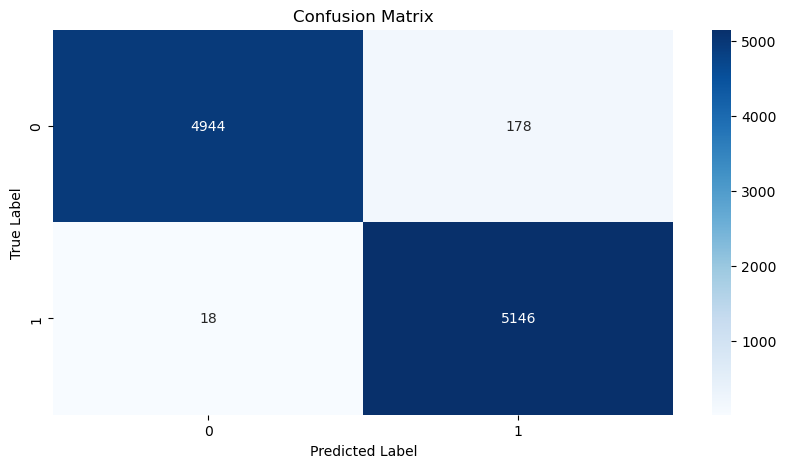

In [79]:
confusion_mtx = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(confusion_mtx, annot = True, fmt='d',ax=ax, cmap = 'Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

Precision: Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of positive predictions.

Recall: Recall is the ratio of true positive predictions to the total actual positives. It measures the ability of the classifier to find all the positive instances.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances precision and recall.

Support: Support is the number of occurrences of each class in the true labels.

In [80]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5122
           1       0.97      1.00      0.98      5164

    accuracy                           0.98     10286
   macro avg       0.98      0.98      0.98     10286
weighted avg       0.98      0.98      0.98     10286



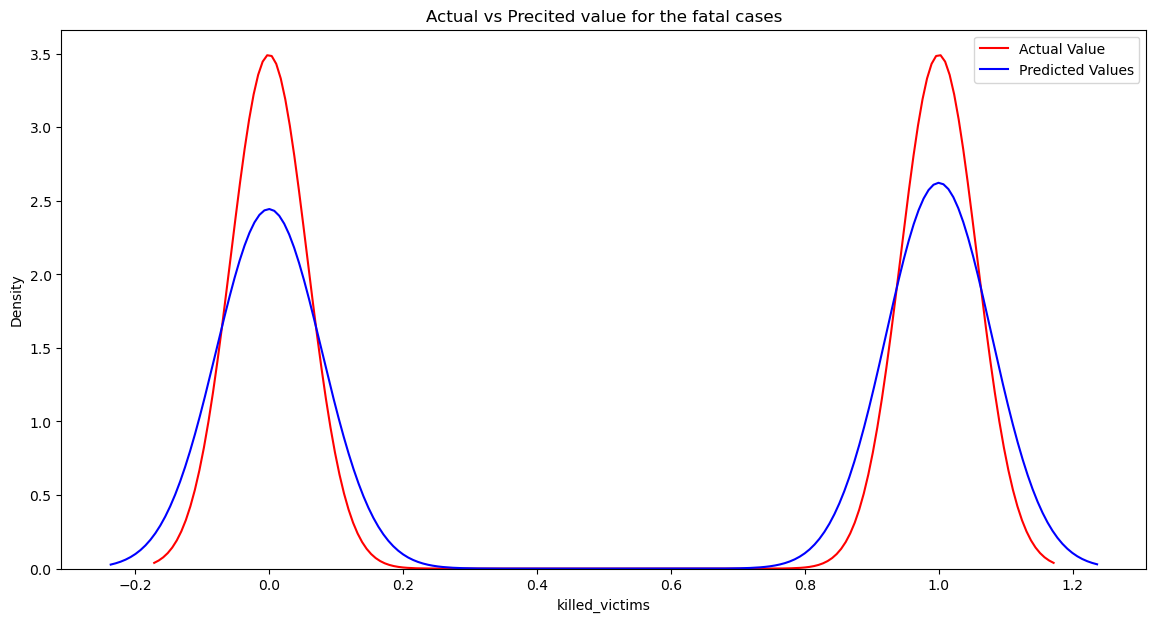

In [83]:
plt.figure(figsize=(14, 7))
ax = sns.distplot(balanced_data['killed_victims'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.legend(loc="best")
plt.title('Actual vs Precited values for the fatal cases')
plt.show()
plt.close()